In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


data = pd.read_csv('penguins.csv')
data = data.dropna()

feature = data[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
label = data['species']

feature_encoded = feature.copy()

feature_encoded['island'] = feature_encoded['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen': 2})
feature_encoded['sex'] = feature_encoded['sex'].map({'Male': 0, 'Female': 1})




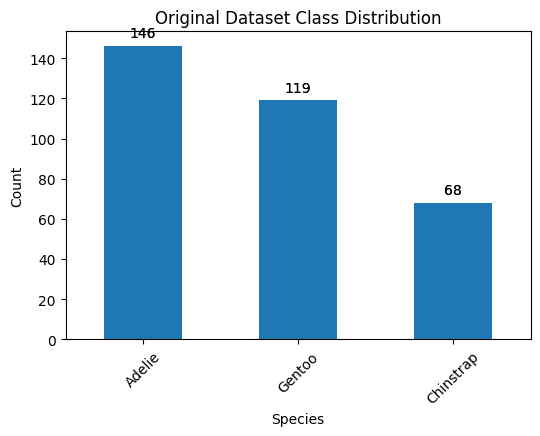

In [2]:

plt.figure(figsize=(6,4))
ax = label.value_counts().plot(kind='bar')

label.value_counts().plot(kind='bar')
plt.title("Original Dataset Class Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.tick_params(axis = 'x', rotation = 45)

for p in ax.patches:  
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center',  
                xytext=(0, 9),  
                textcoords='offset points')
plt.show()


In [3]:
split_ratios = [0.4, 0.6, 0.8, 0.9]
random_state = [0, 1, 2, 3]

datasets = []


for ratio in split_ratios:
    for seed in random_state:
        feature_train, feature_test, label_train, label_test = train_test_split(
            feature_encoded, label,
            train_size = ratio,
            random_state = seed,
            shuffle = True,
            stratify = label,
        )
        
        datasets.append({
            'ratio': ratio,
            'seed': seed,
            'feature_train': feature_train,
            'feature_test': feature_test,
            'label_train': label_train,
            'label_test': label_test,
        })


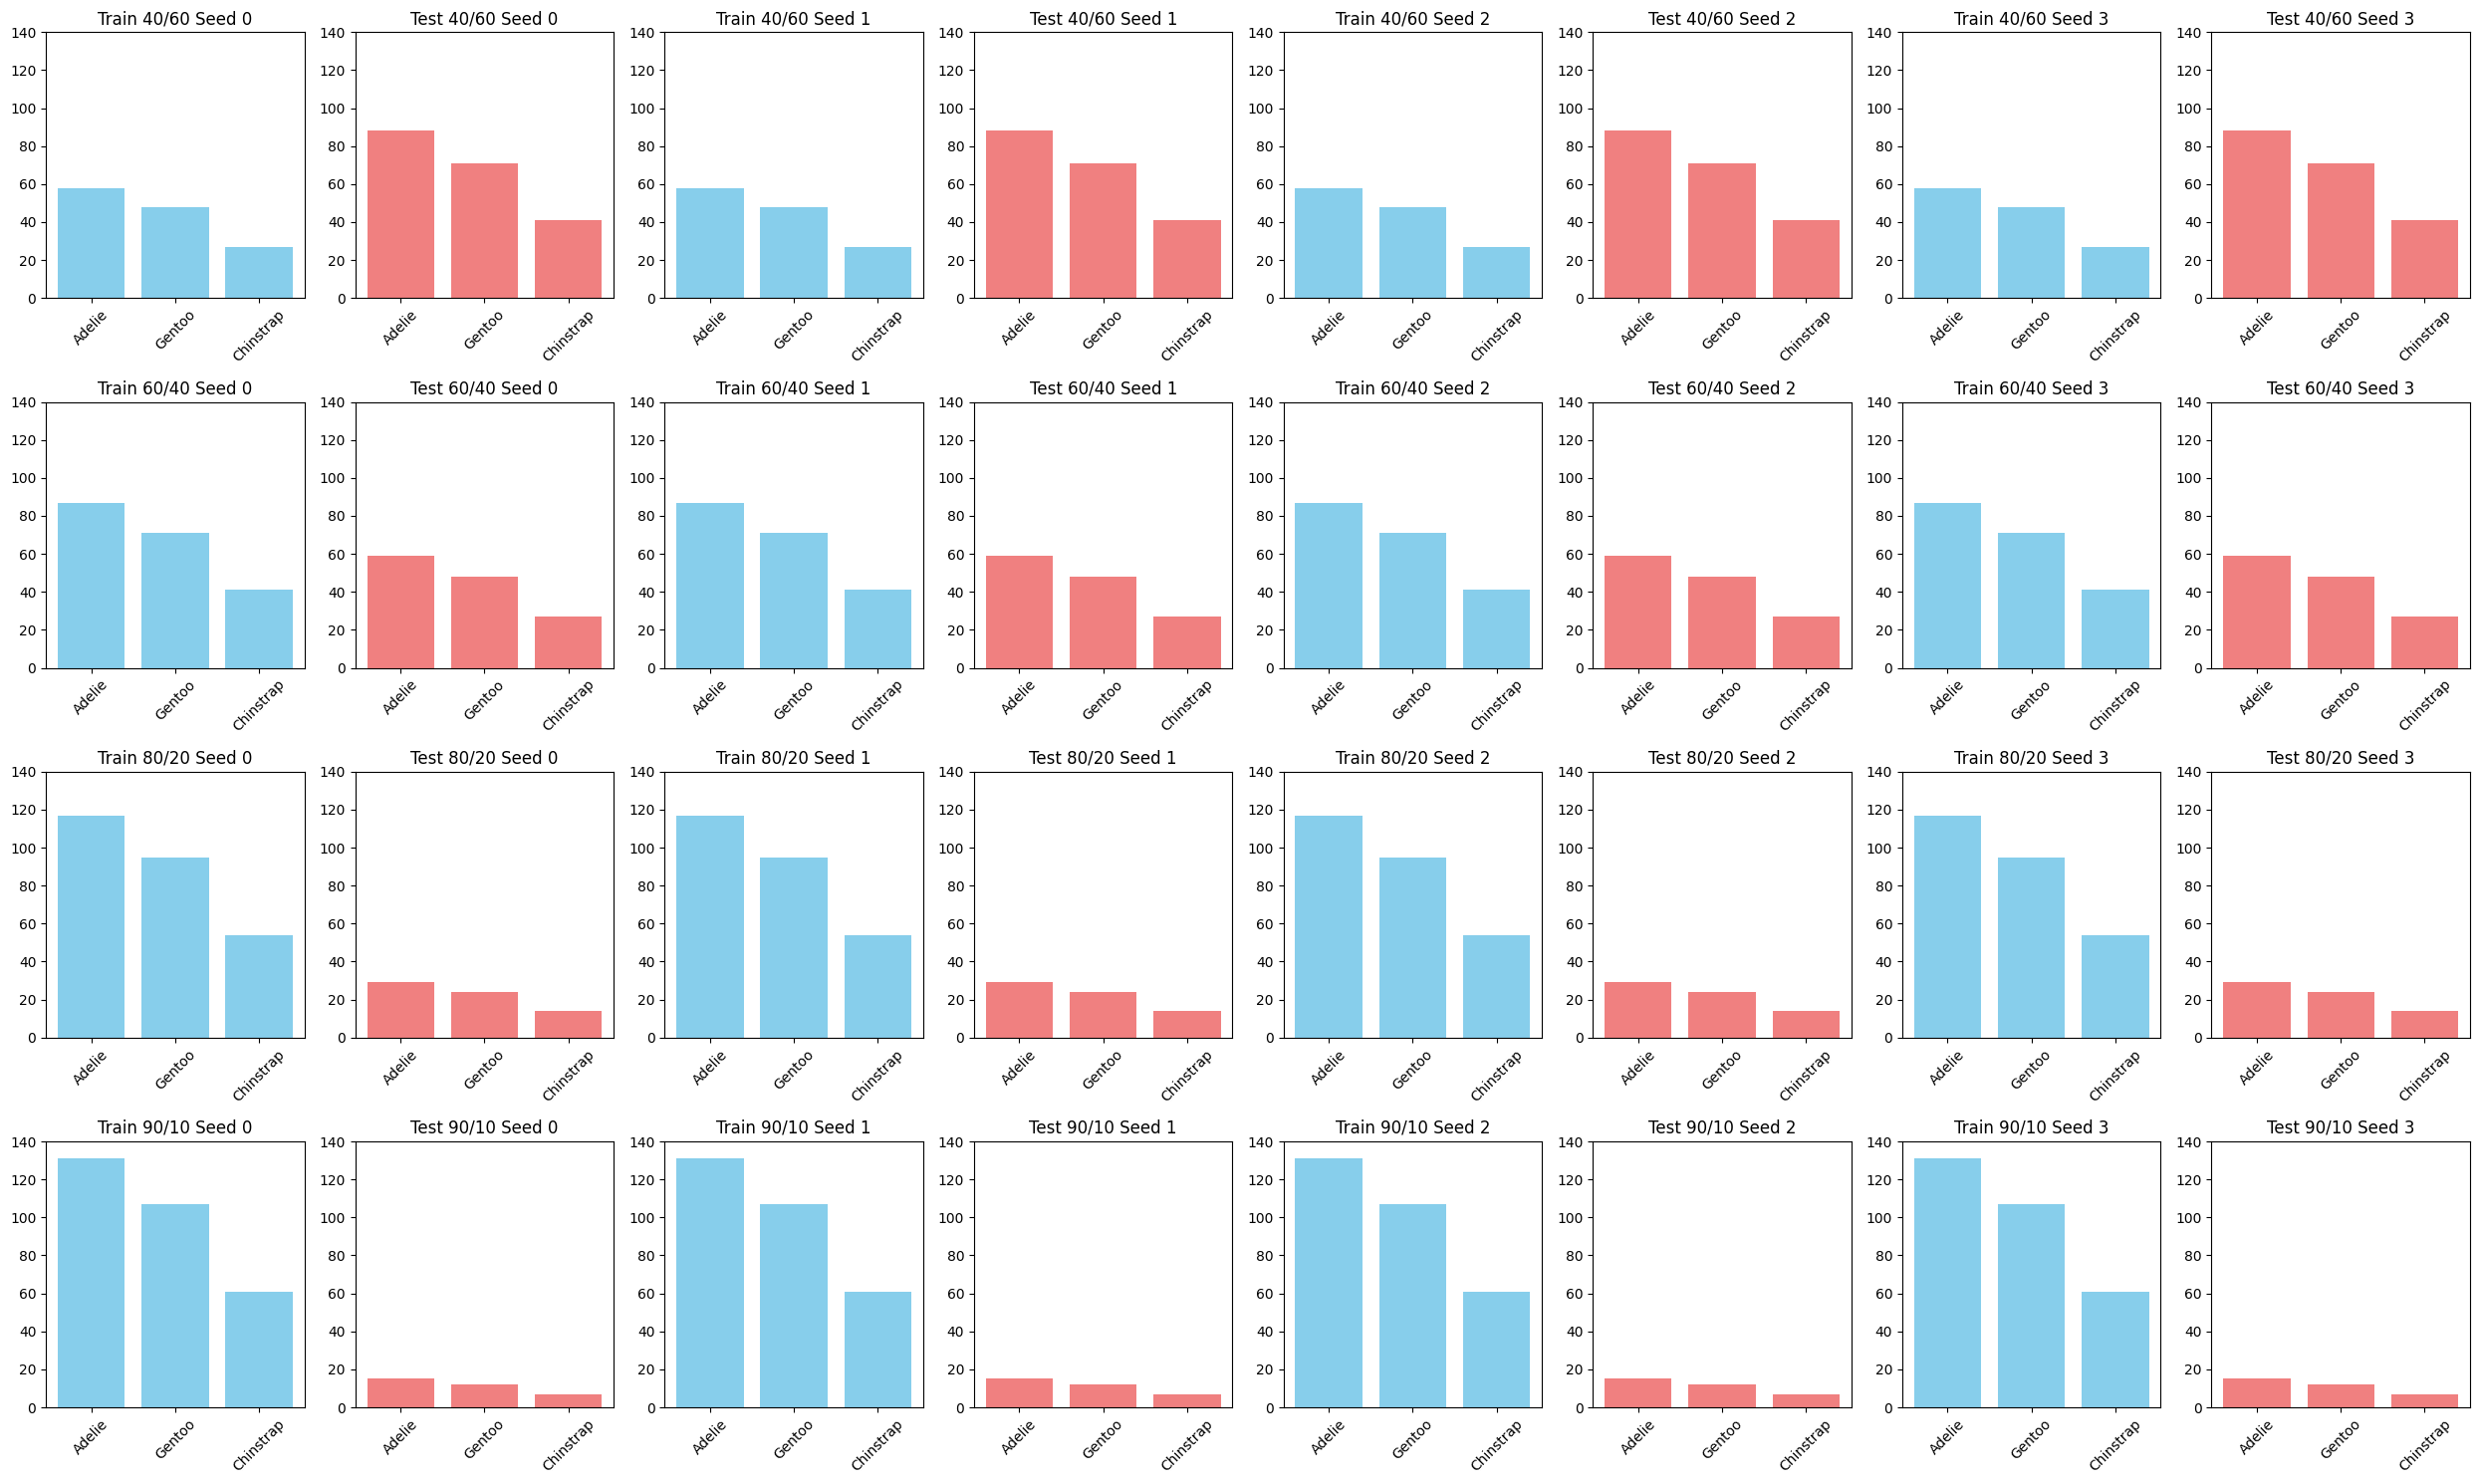

In [46]:
fig, axes = plt.subplots(len(split_ratios), len(random_state)*2, figsize=(25, 15))

for idx, dataset in enumerate(datasets):
    row = idx // len(random_state)
    col = (idx % len(random_state)) * 2

    # Training set plot
    axes[row, col].bar(dataset['label_train'].value_counts().index, dataset['label_train'].value_counts().values, color='skyblue')
    axes[row, col].set_title(f"Train {int(dataset['ratio']*100)}/{100-int(dataset['ratio']*100)} Seed {dataset['seed']}")
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set_ylim(0, 140)

    # Testing set plot
    axes[row, col + 1].bar(dataset['label_test'].value_counts().index, dataset['label_test'].value_counts().values, color='lightcoral')
    axes[row, col + 1].set_title(f"Test {int(dataset['ratio']*100)}/{100-int(dataset['ratio']*100)} Seed {dataset['seed']}")
    axes[row, col + 1].tick_params(axis='x', rotation=45)
    axes[row, col + 1].set_ylim(0, 140)

plt.tight_layout()
plt.show()


Dataset 1: Accuracy (0.4 split, seed 0): 0.98
Classification Report for Dataset 1:
              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.98        88
   Chinstrap       0.93      1.00      0.96        41
      Gentoo       0.99      1.00      0.99        71

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



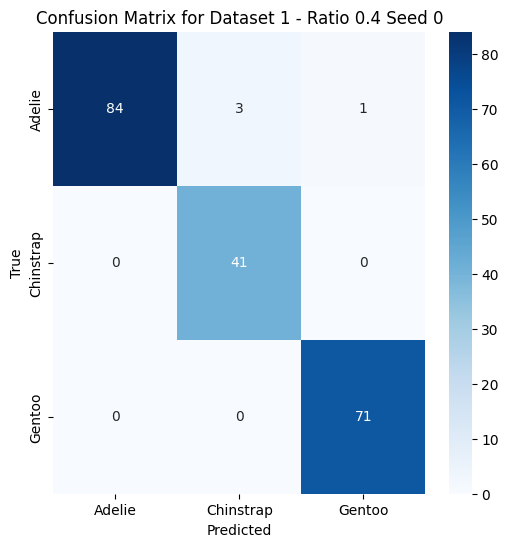

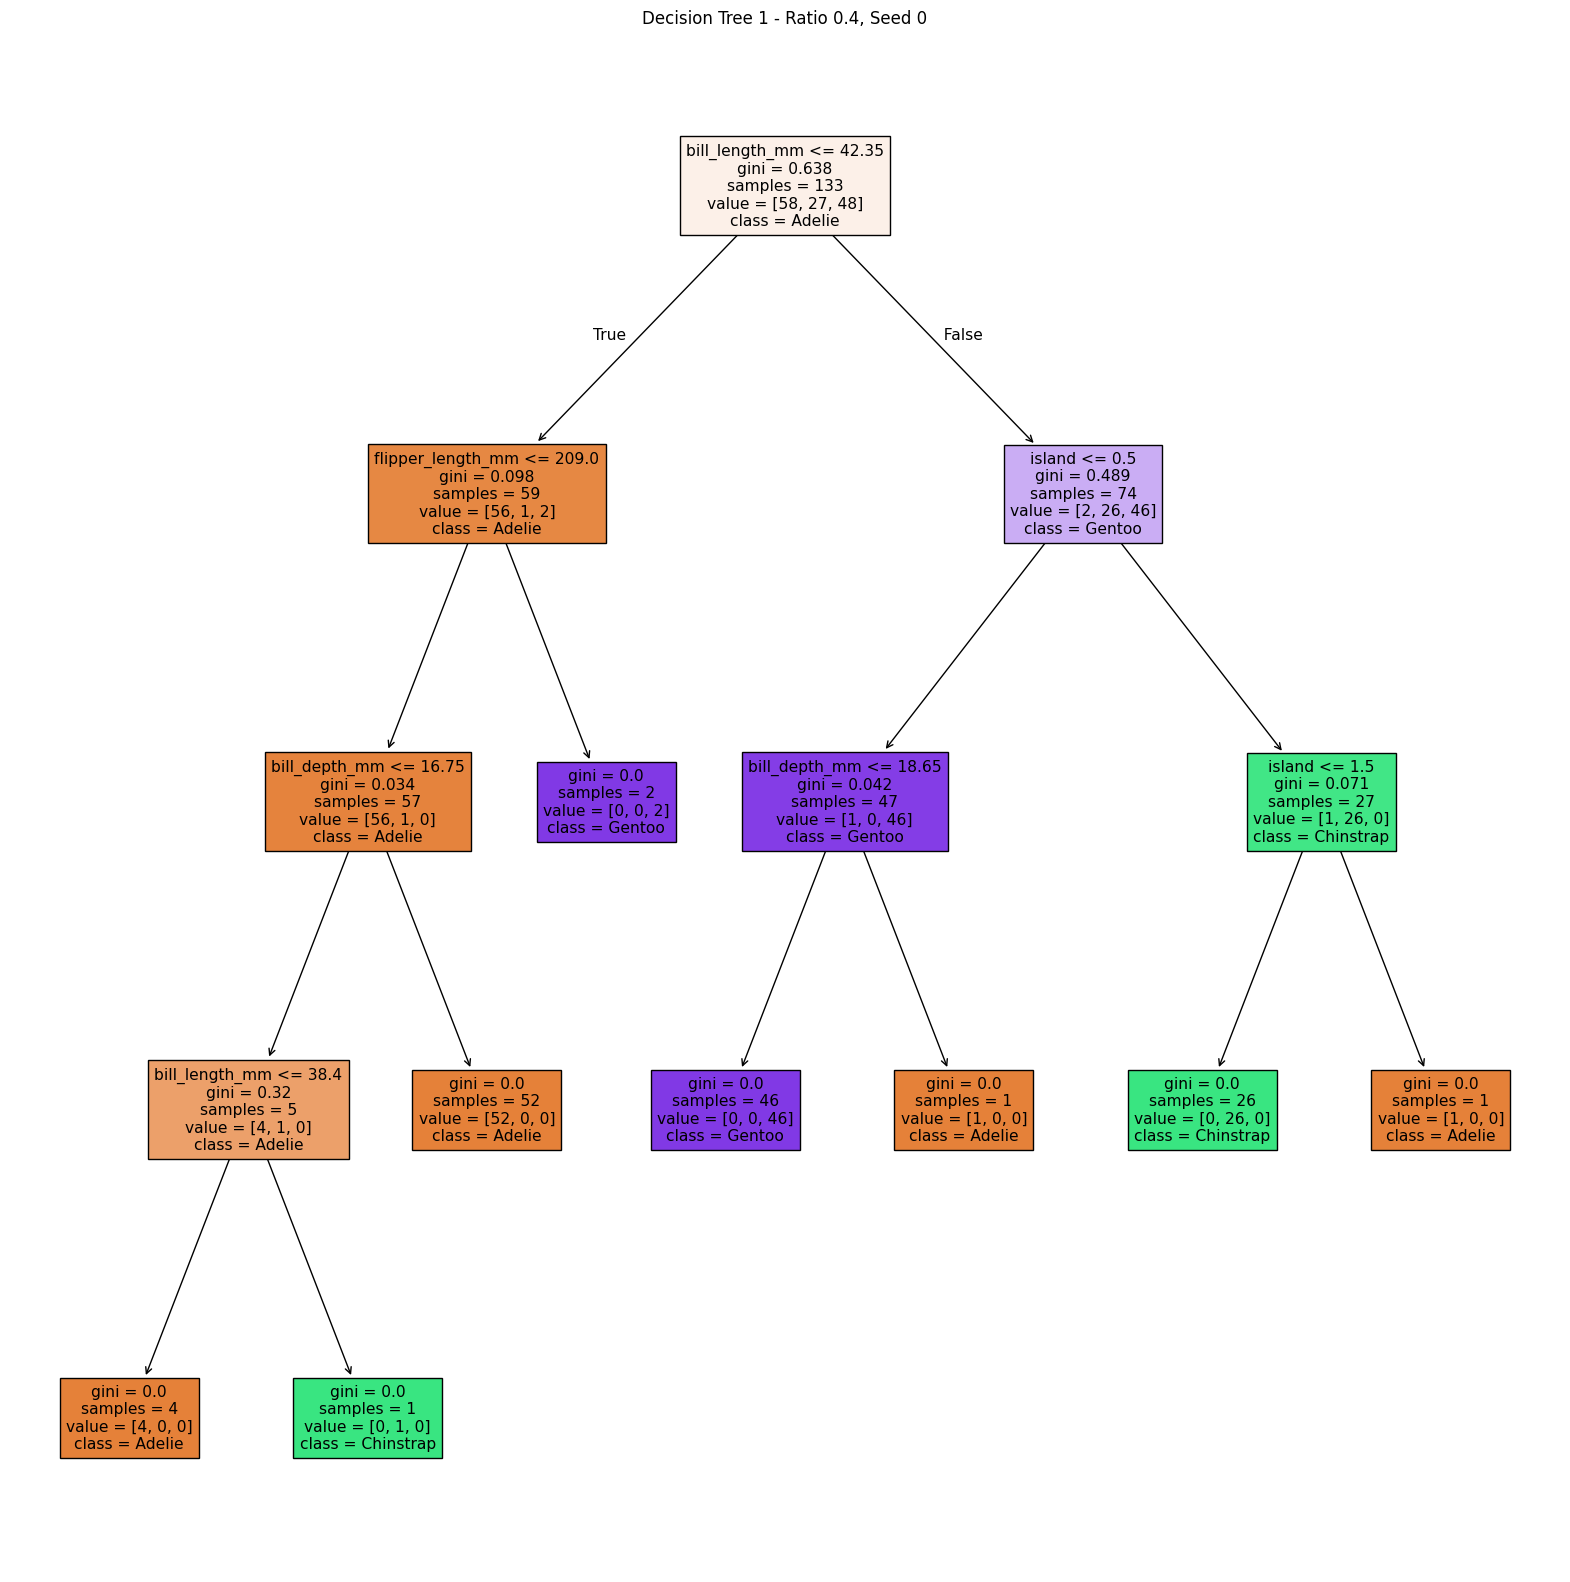

Dataset 2: Accuracy (0.4 split, seed 1): 0.955
Classification Report for Dataset 2:
              precision    recall  f1-score   support

      Adelie       0.95      0.94      0.95        88
   Chinstrap       0.90      0.93      0.92        41
      Gentoo       0.99      0.99      0.99        71

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200



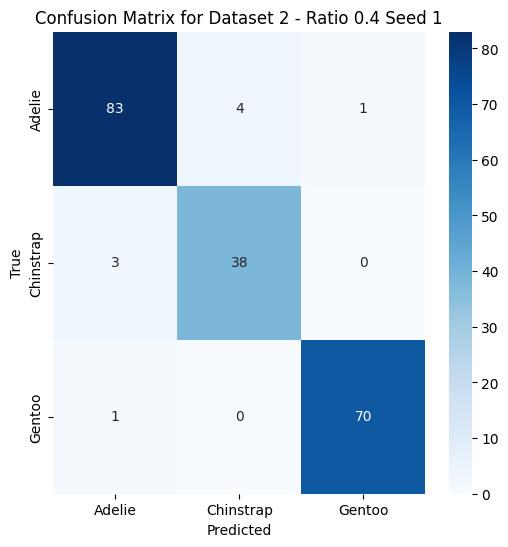

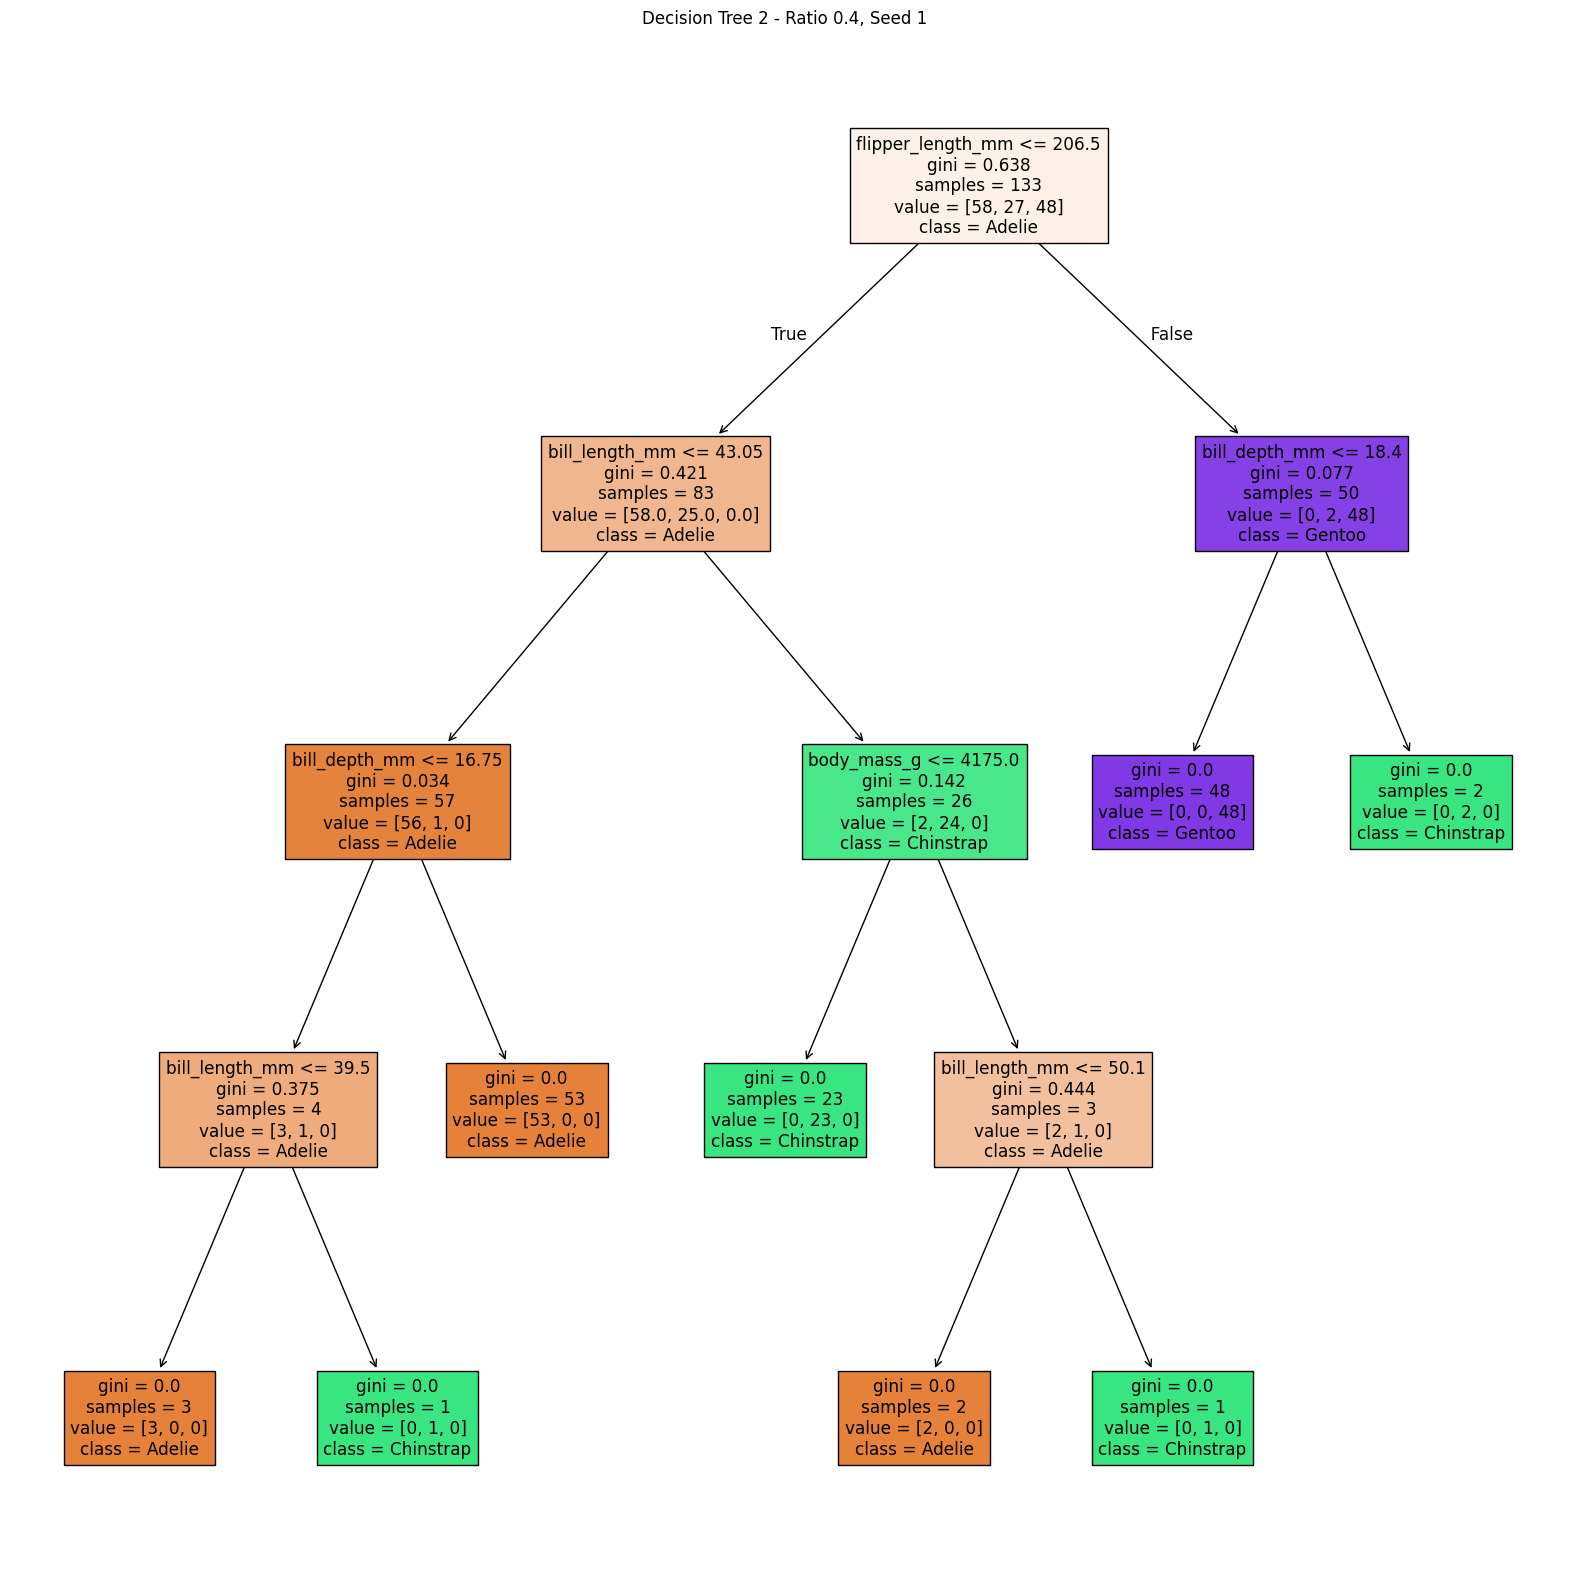

Dataset 3: Accuracy (0.4 split, seed 2): 0.92
Classification Report for Dataset 3:
              precision    recall  f1-score   support

      Adelie       0.99      0.97      0.98        88
   Chinstrap       0.82      0.80      0.81        41
      Gentoo       0.89      0.93      0.91        71

    accuracy                           0.92       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.92      0.92      0.92       200



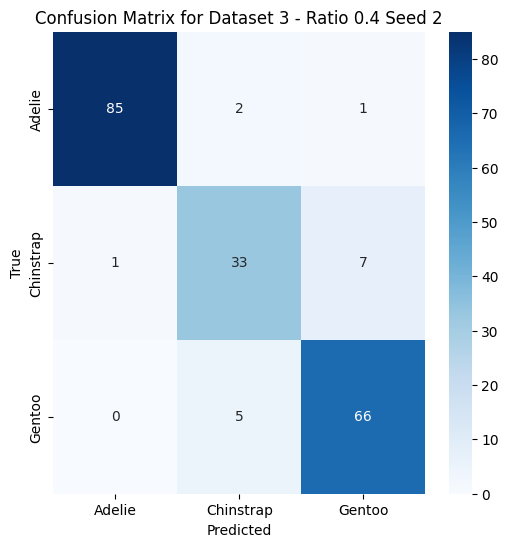

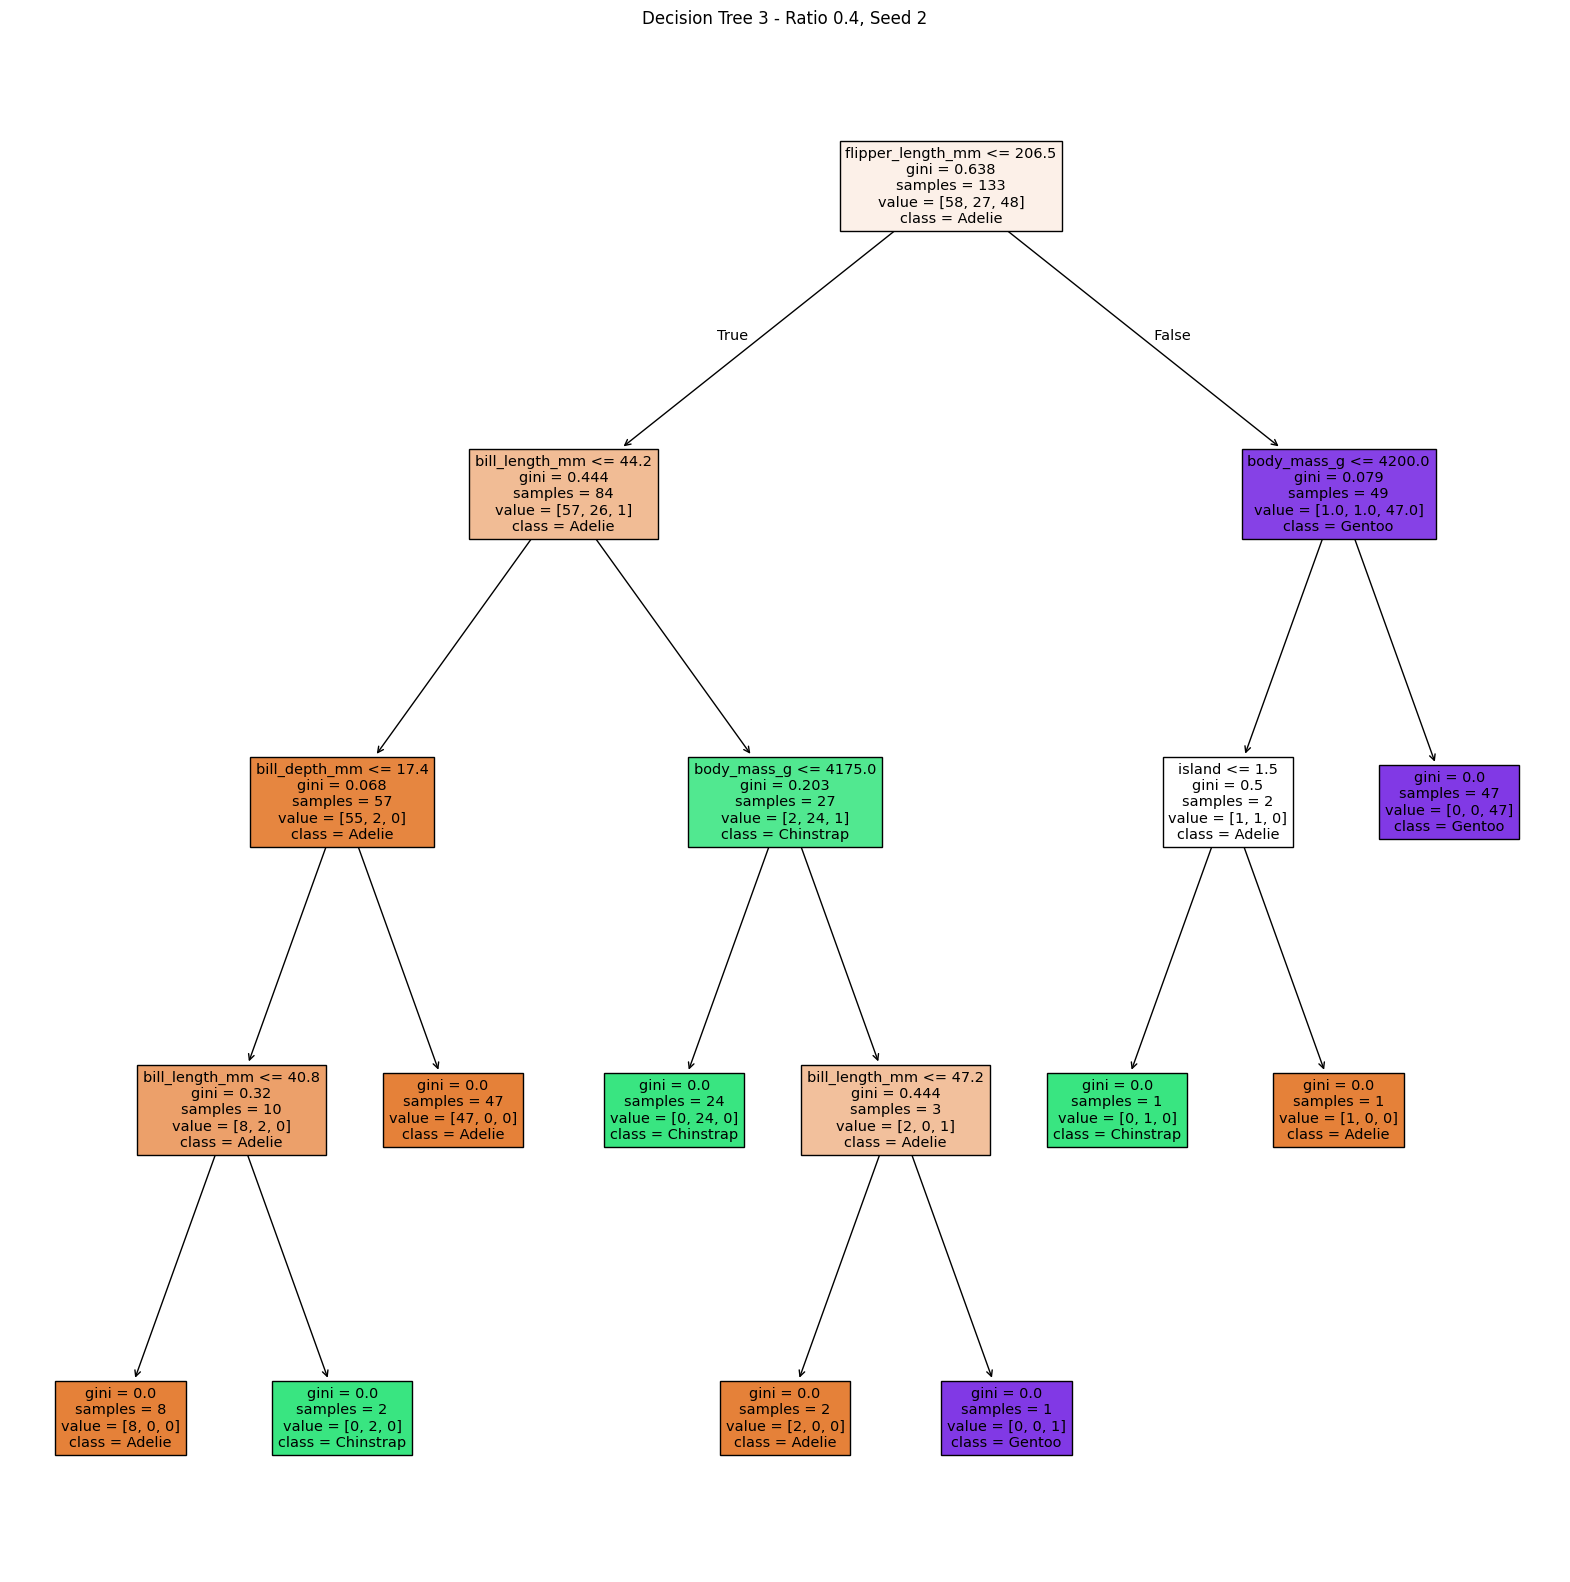

Dataset 4: Accuracy (0.4 split, seed 3): 0.955
Classification Report for Dataset 4:
              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.96        88
   Chinstrap       0.92      0.88      0.90        41
      Gentoo       0.99      0.99      0.99        71

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200



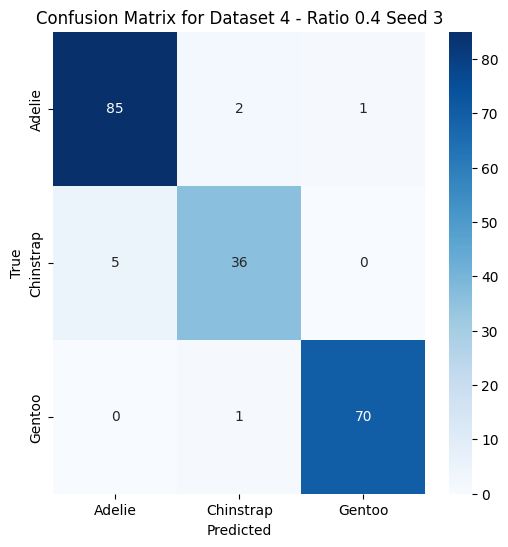

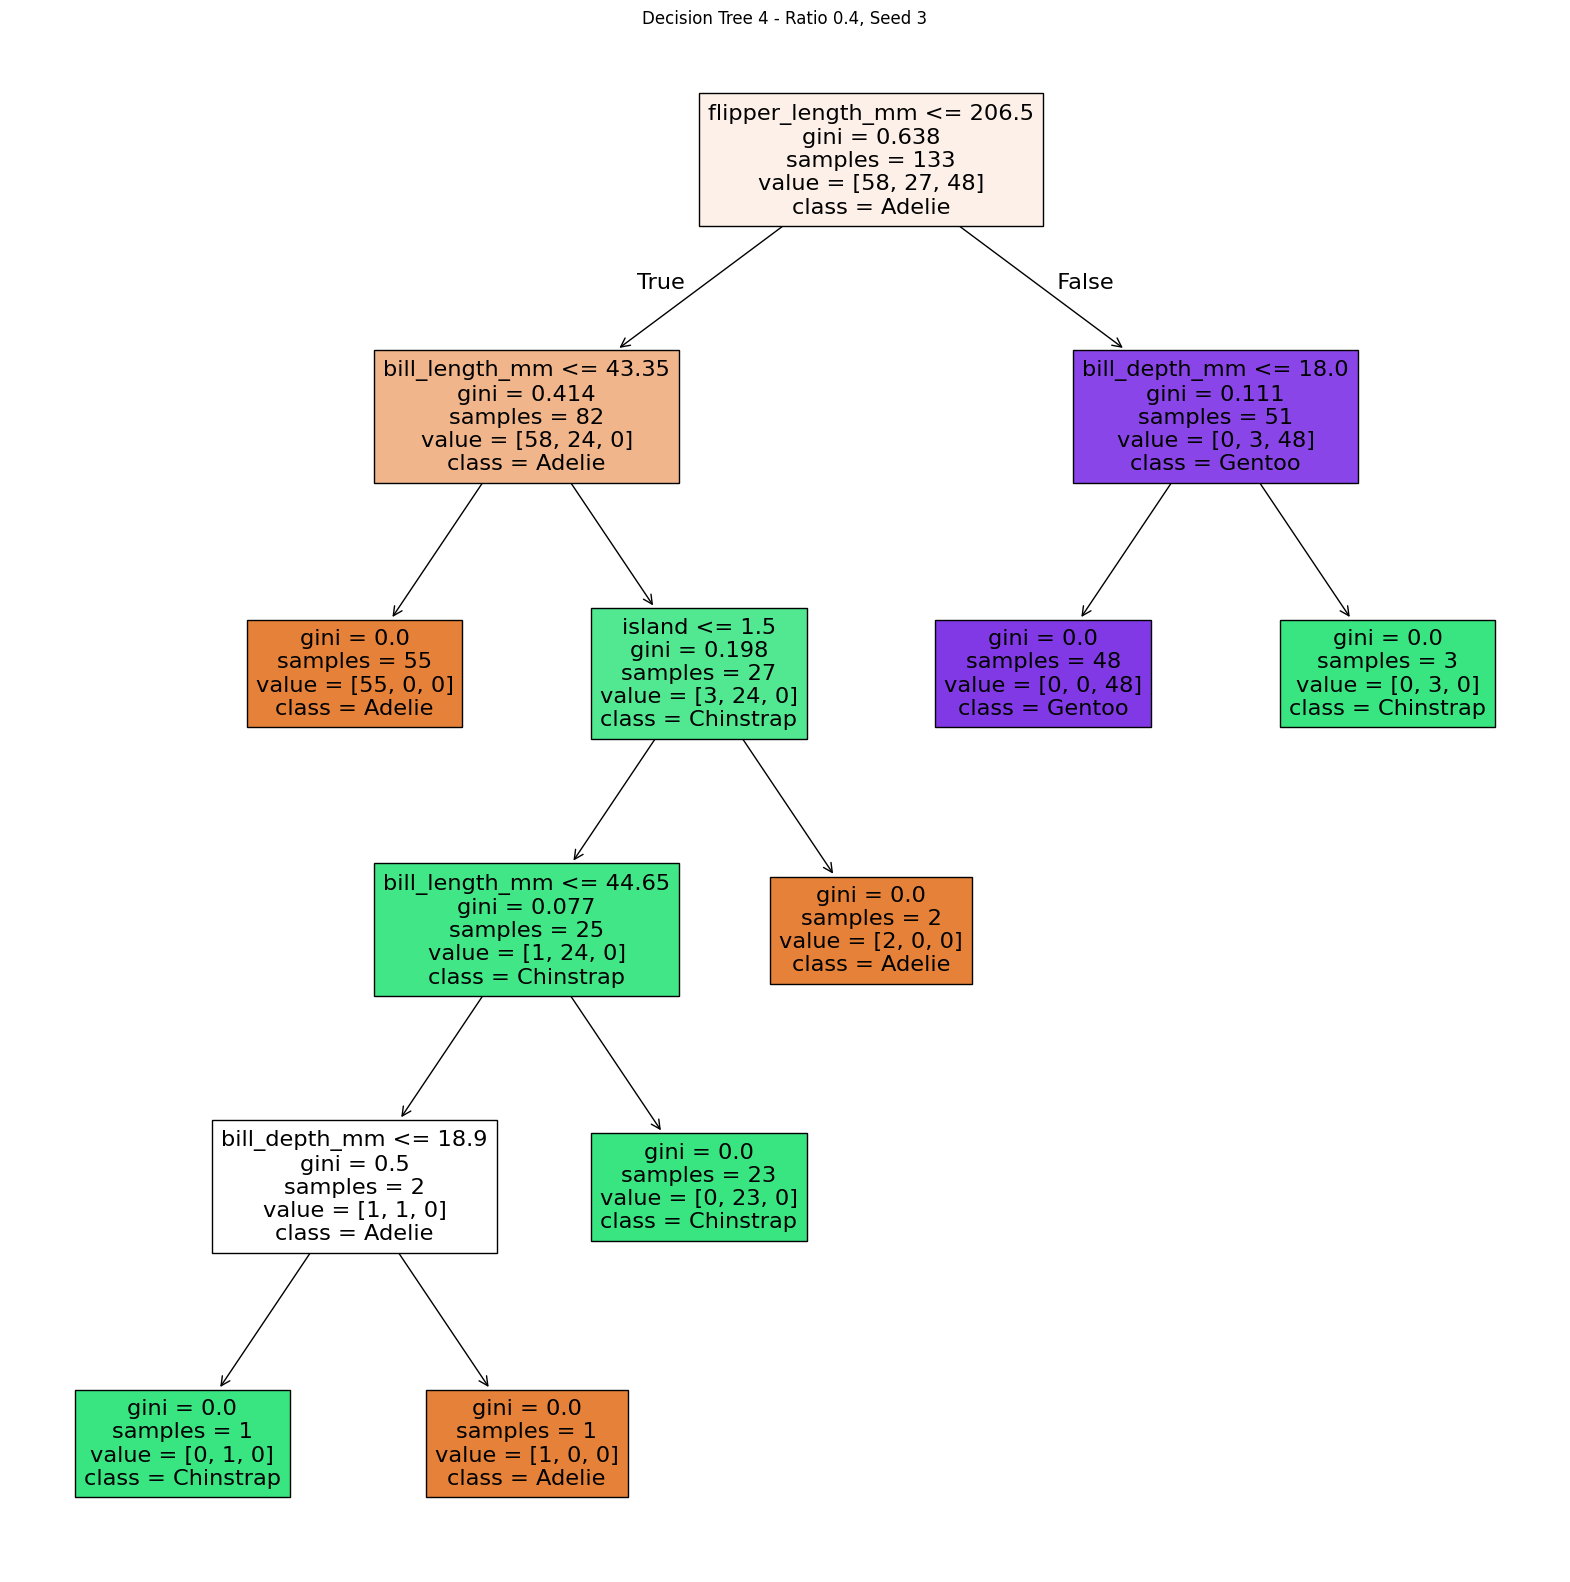

Dataset 5: Accuracy (0.6 split, seed 0): 0.9626865671641791
Classification Report for Dataset 5:
              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        59
   Chinstrap       0.89      0.93      0.91        27
      Gentoo       1.00      1.00      1.00        48

    accuracy                           0.96       134
   macro avg       0.95      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134



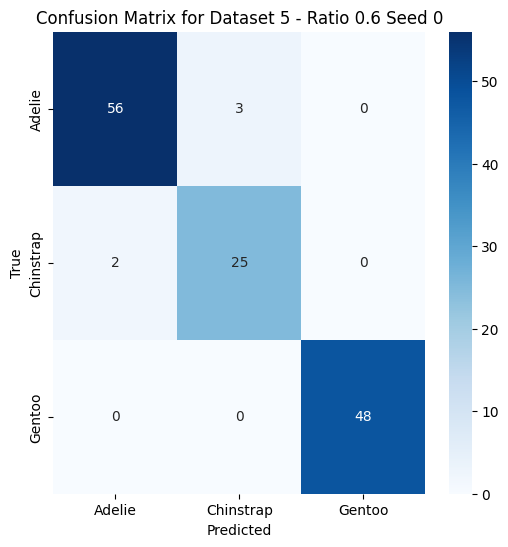

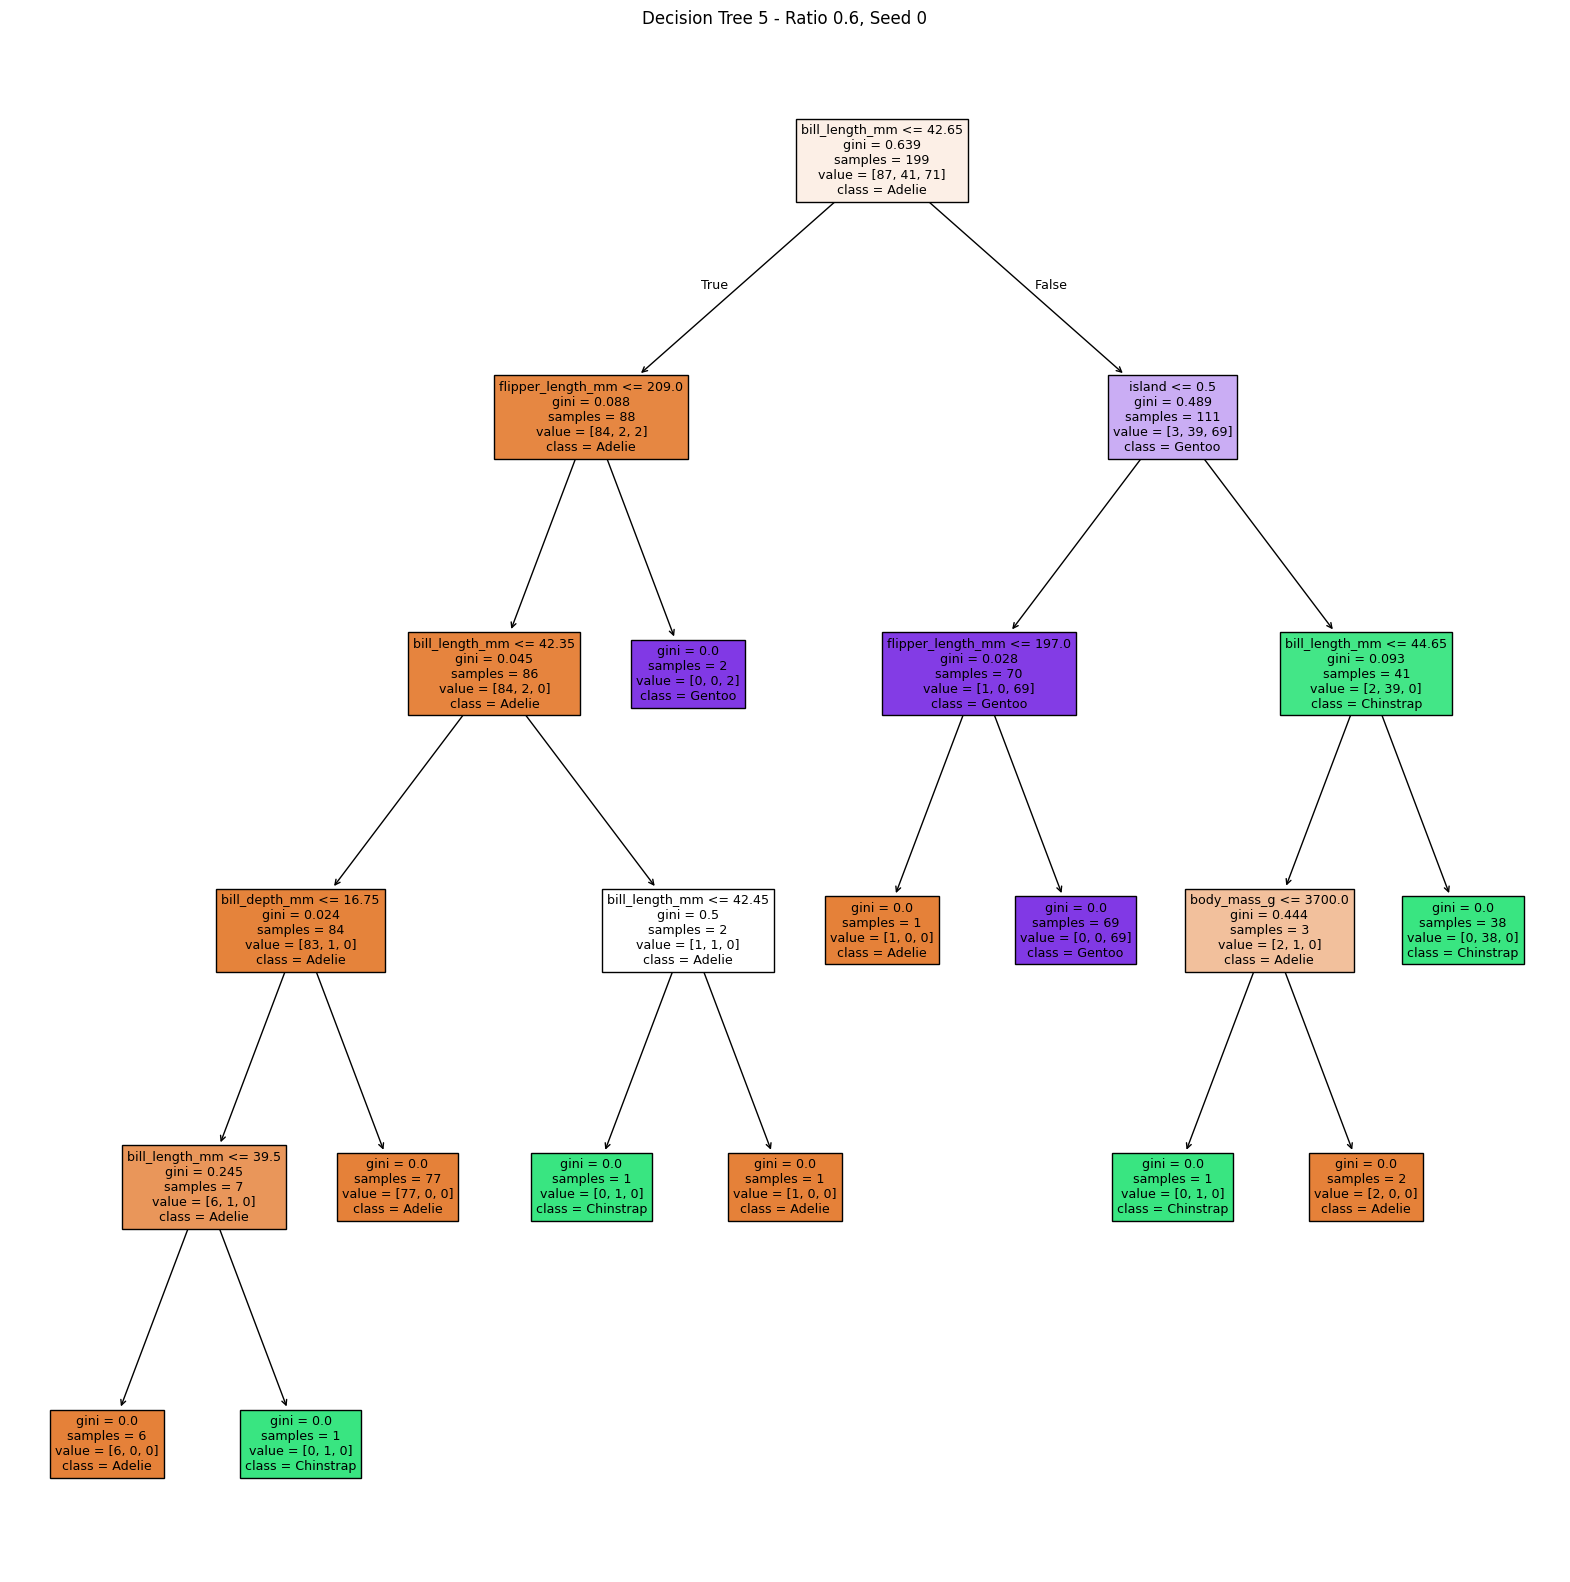

Dataset 6: Accuracy (0.6 split, seed 1): 0.9626865671641791
Classification Report for Dataset 6:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        59
   Chinstrap       0.89      0.93      0.91        27
      Gentoo       1.00      0.98      0.99        48

    accuracy                           0.96       134
   macro avg       0.95      0.96      0.95       134
weighted avg       0.96      0.96      0.96       134



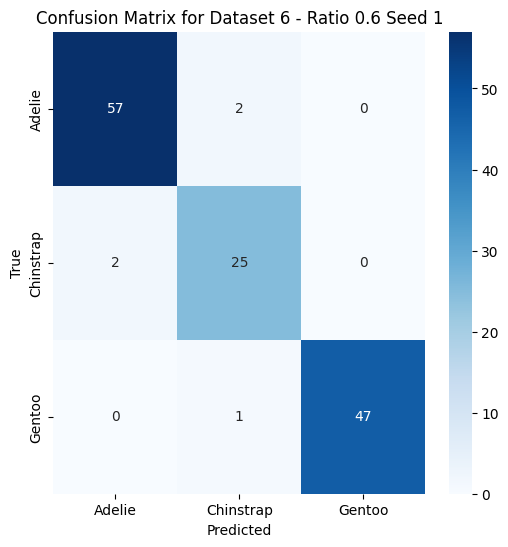

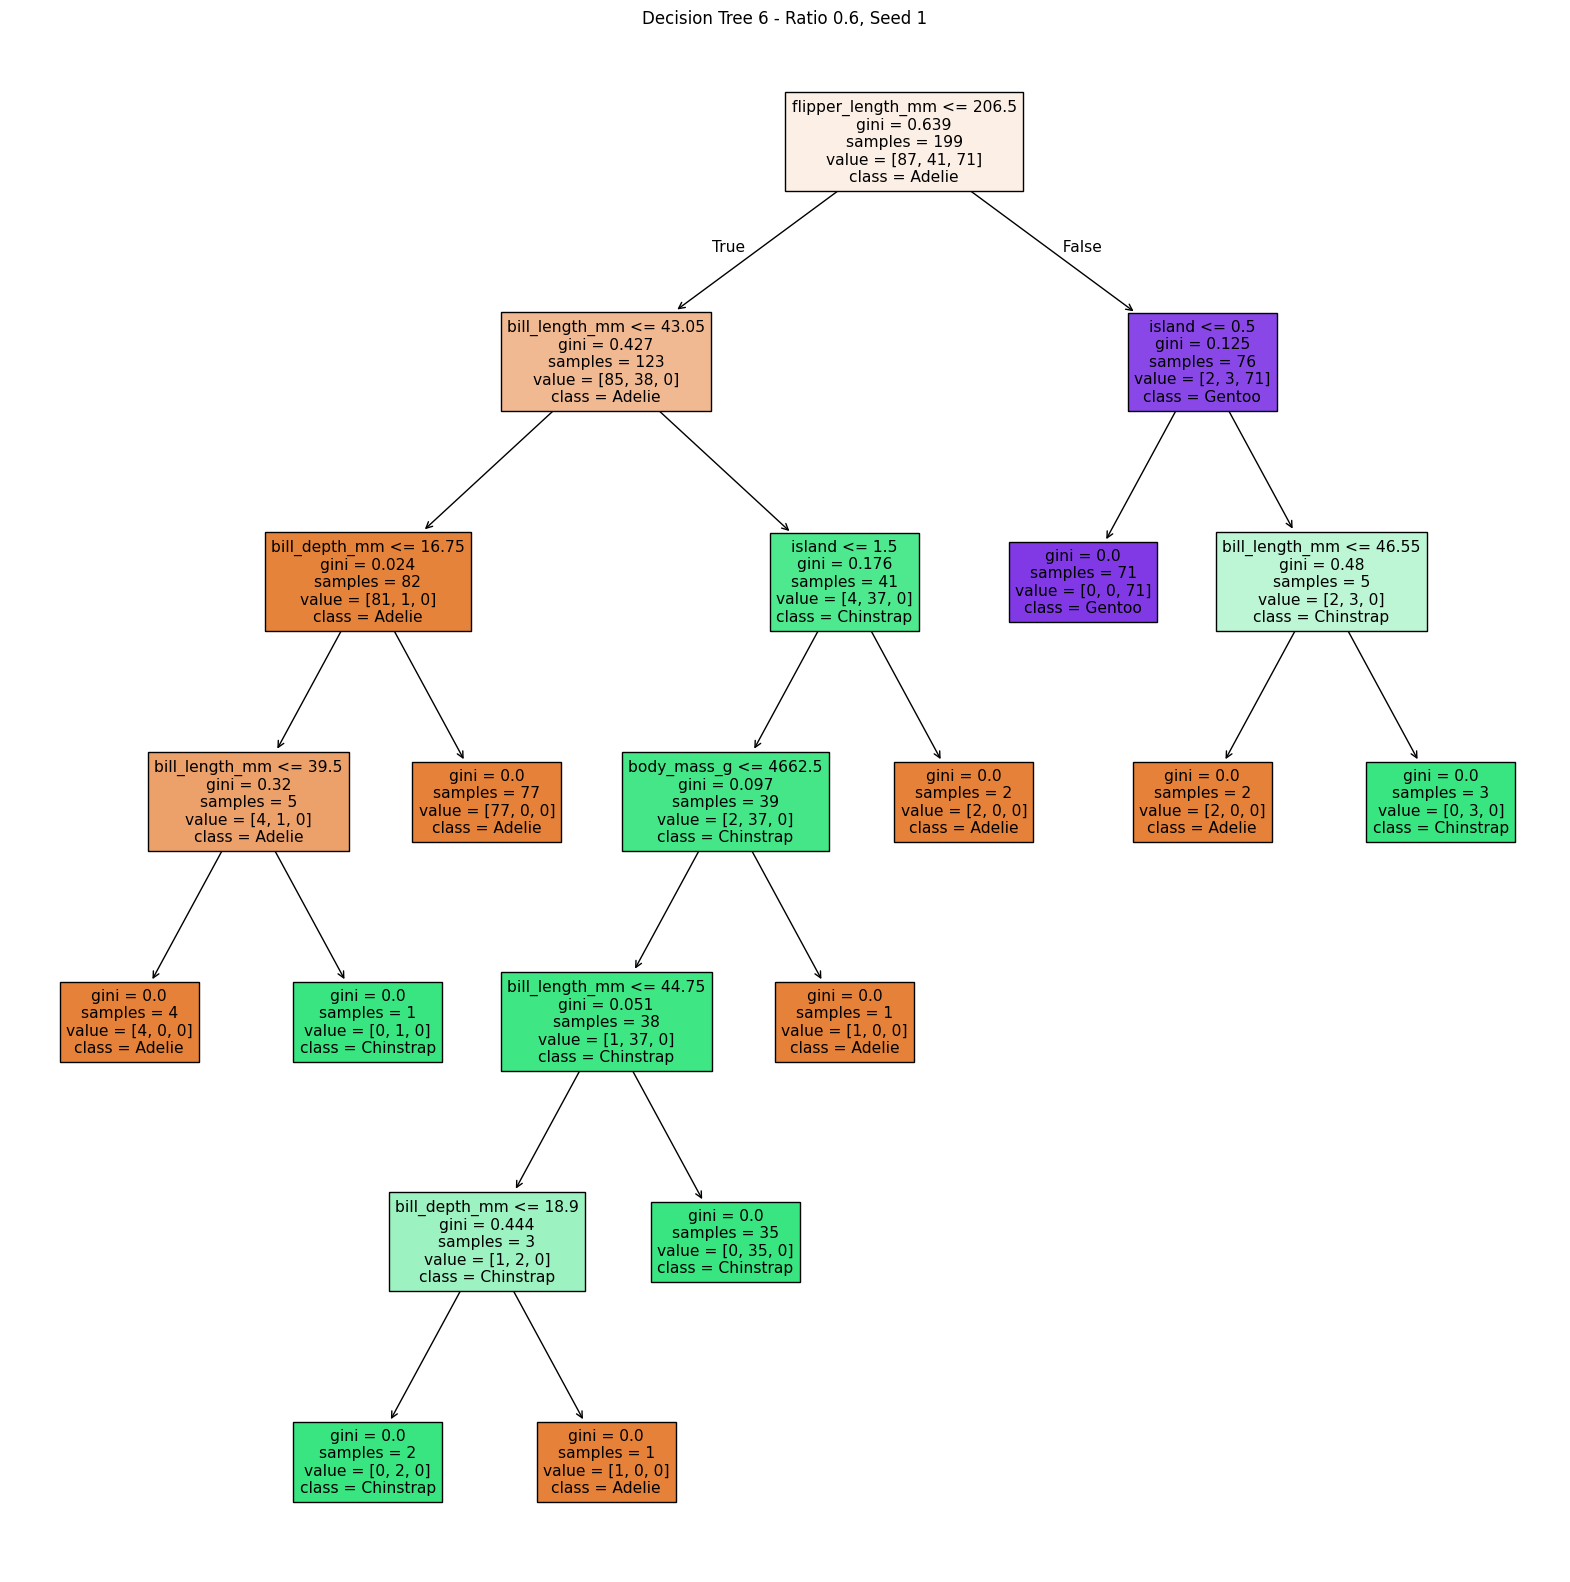

Dataset 7: Accuracy (0.6 split, seed 2): 0.9626865671641791
Classification Report for Dataset 7:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        59
   Chinstrap       0.92      0.89      0.91        27
      Gentoo       0.98      1.00      0.99        48

    accuracy                           0.96       134
   macro avg       0.96      0.95      0.95       134
weighted avg       0.96      0.96      0.96       134



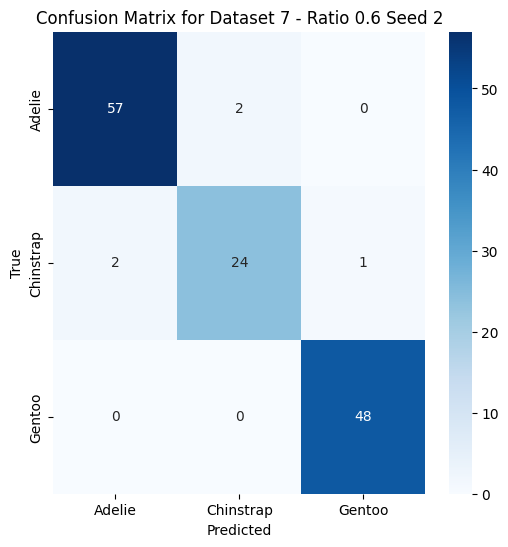

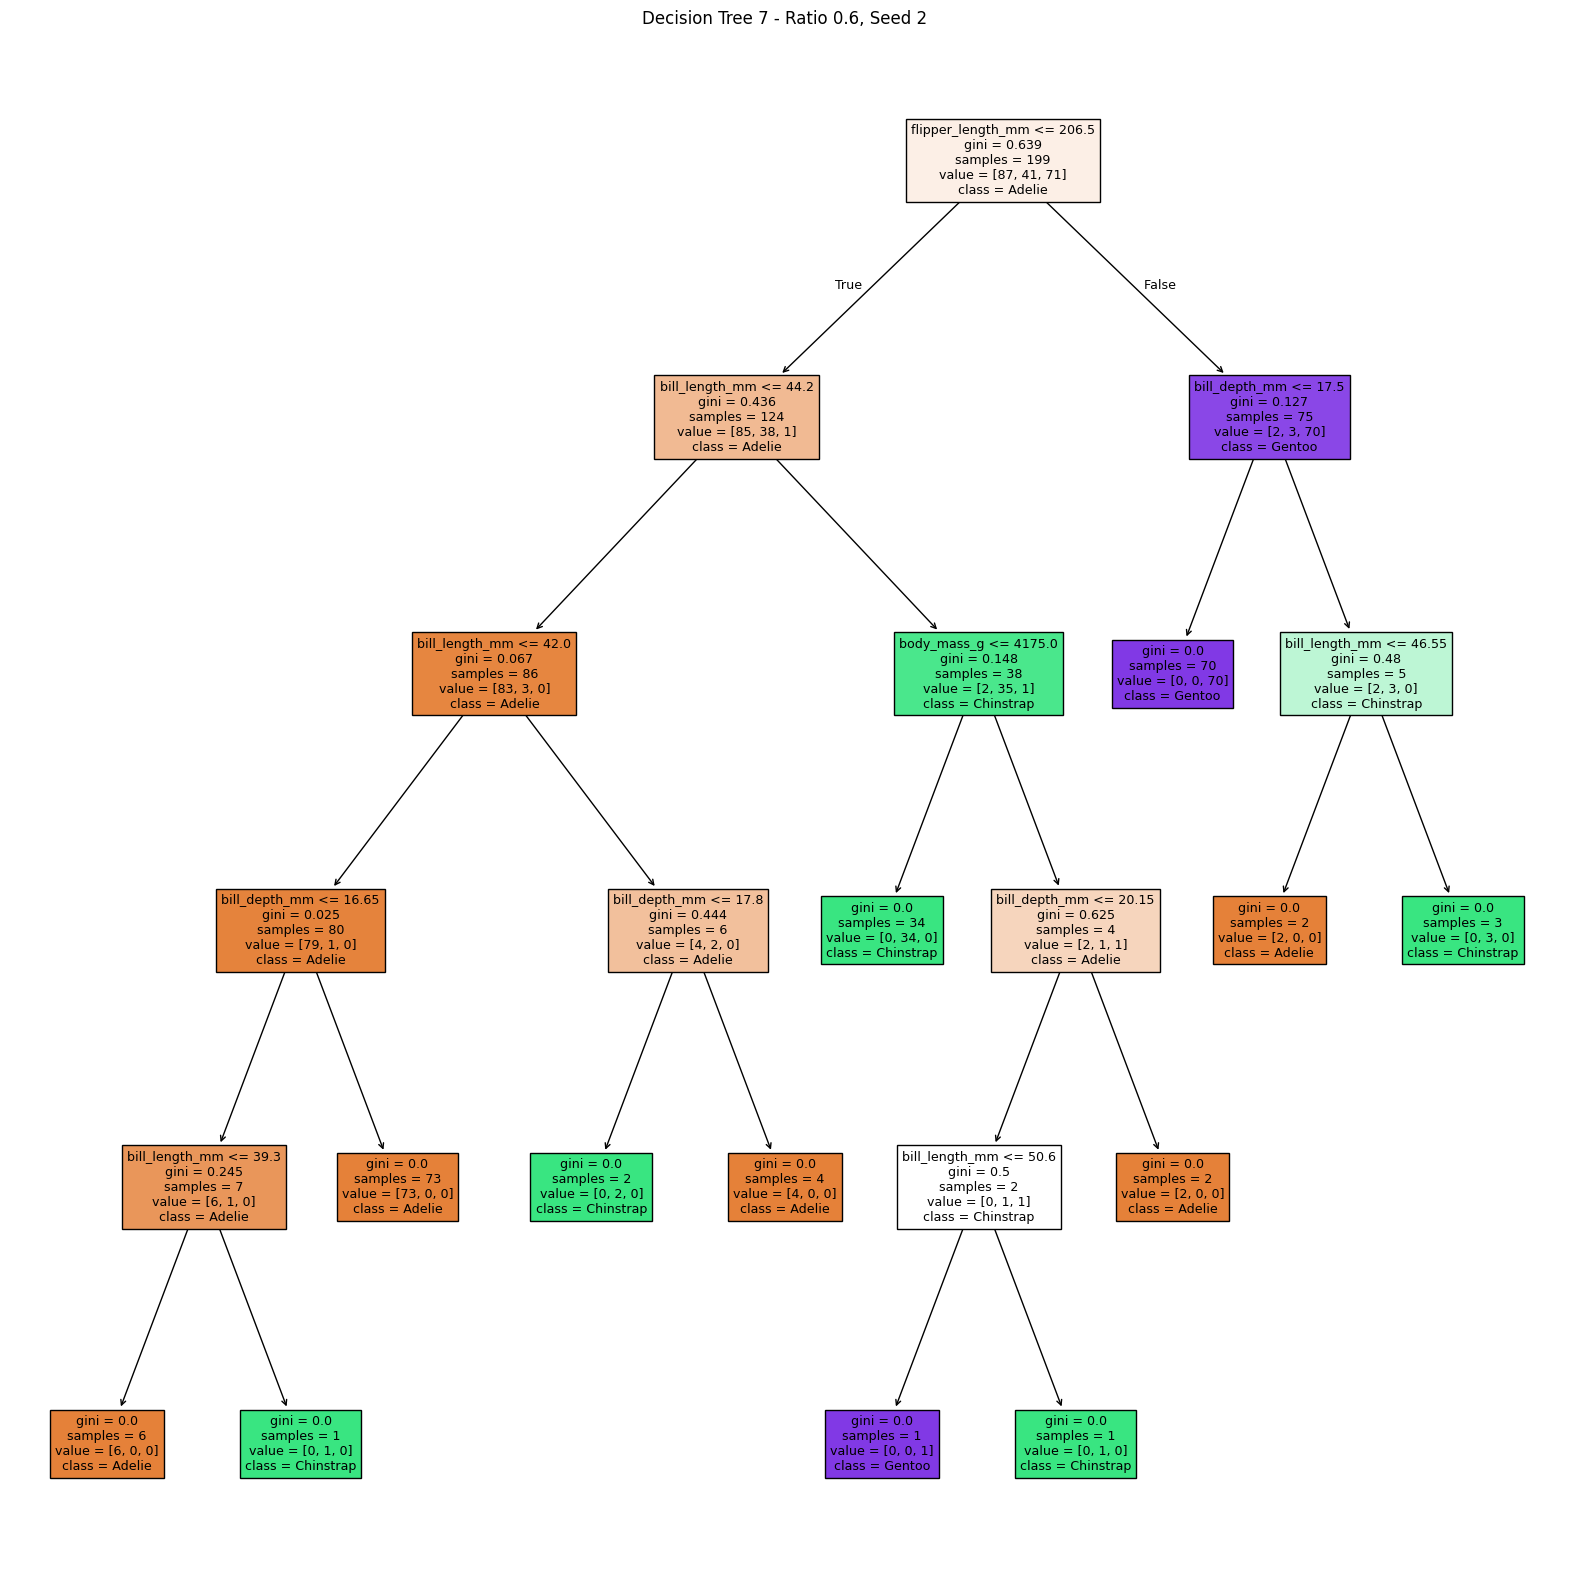

Dataset 8: Accuracy (0.6 split, seed 3): 0.9701492537313433
Classification Report for Dataset 8:
              precision    recall  f1-score   support

      Adelie       0.98      0.97      0.97        59
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       0.98      0.98      0.98        48

    accuracy                           0.97       134
   macro avg       0.96      0.97      0.97       134
weighted avg       0.97      0.97      0.97       134



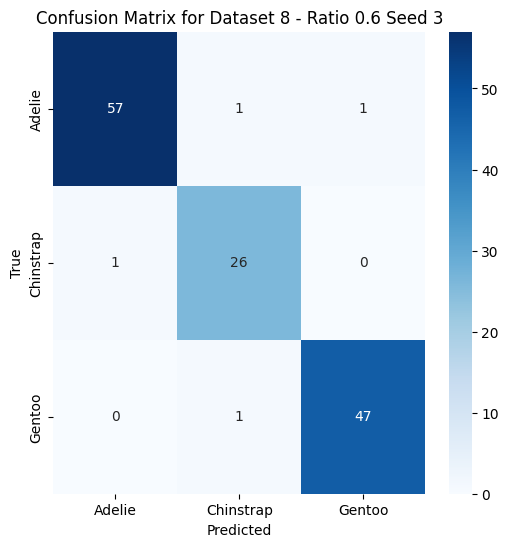

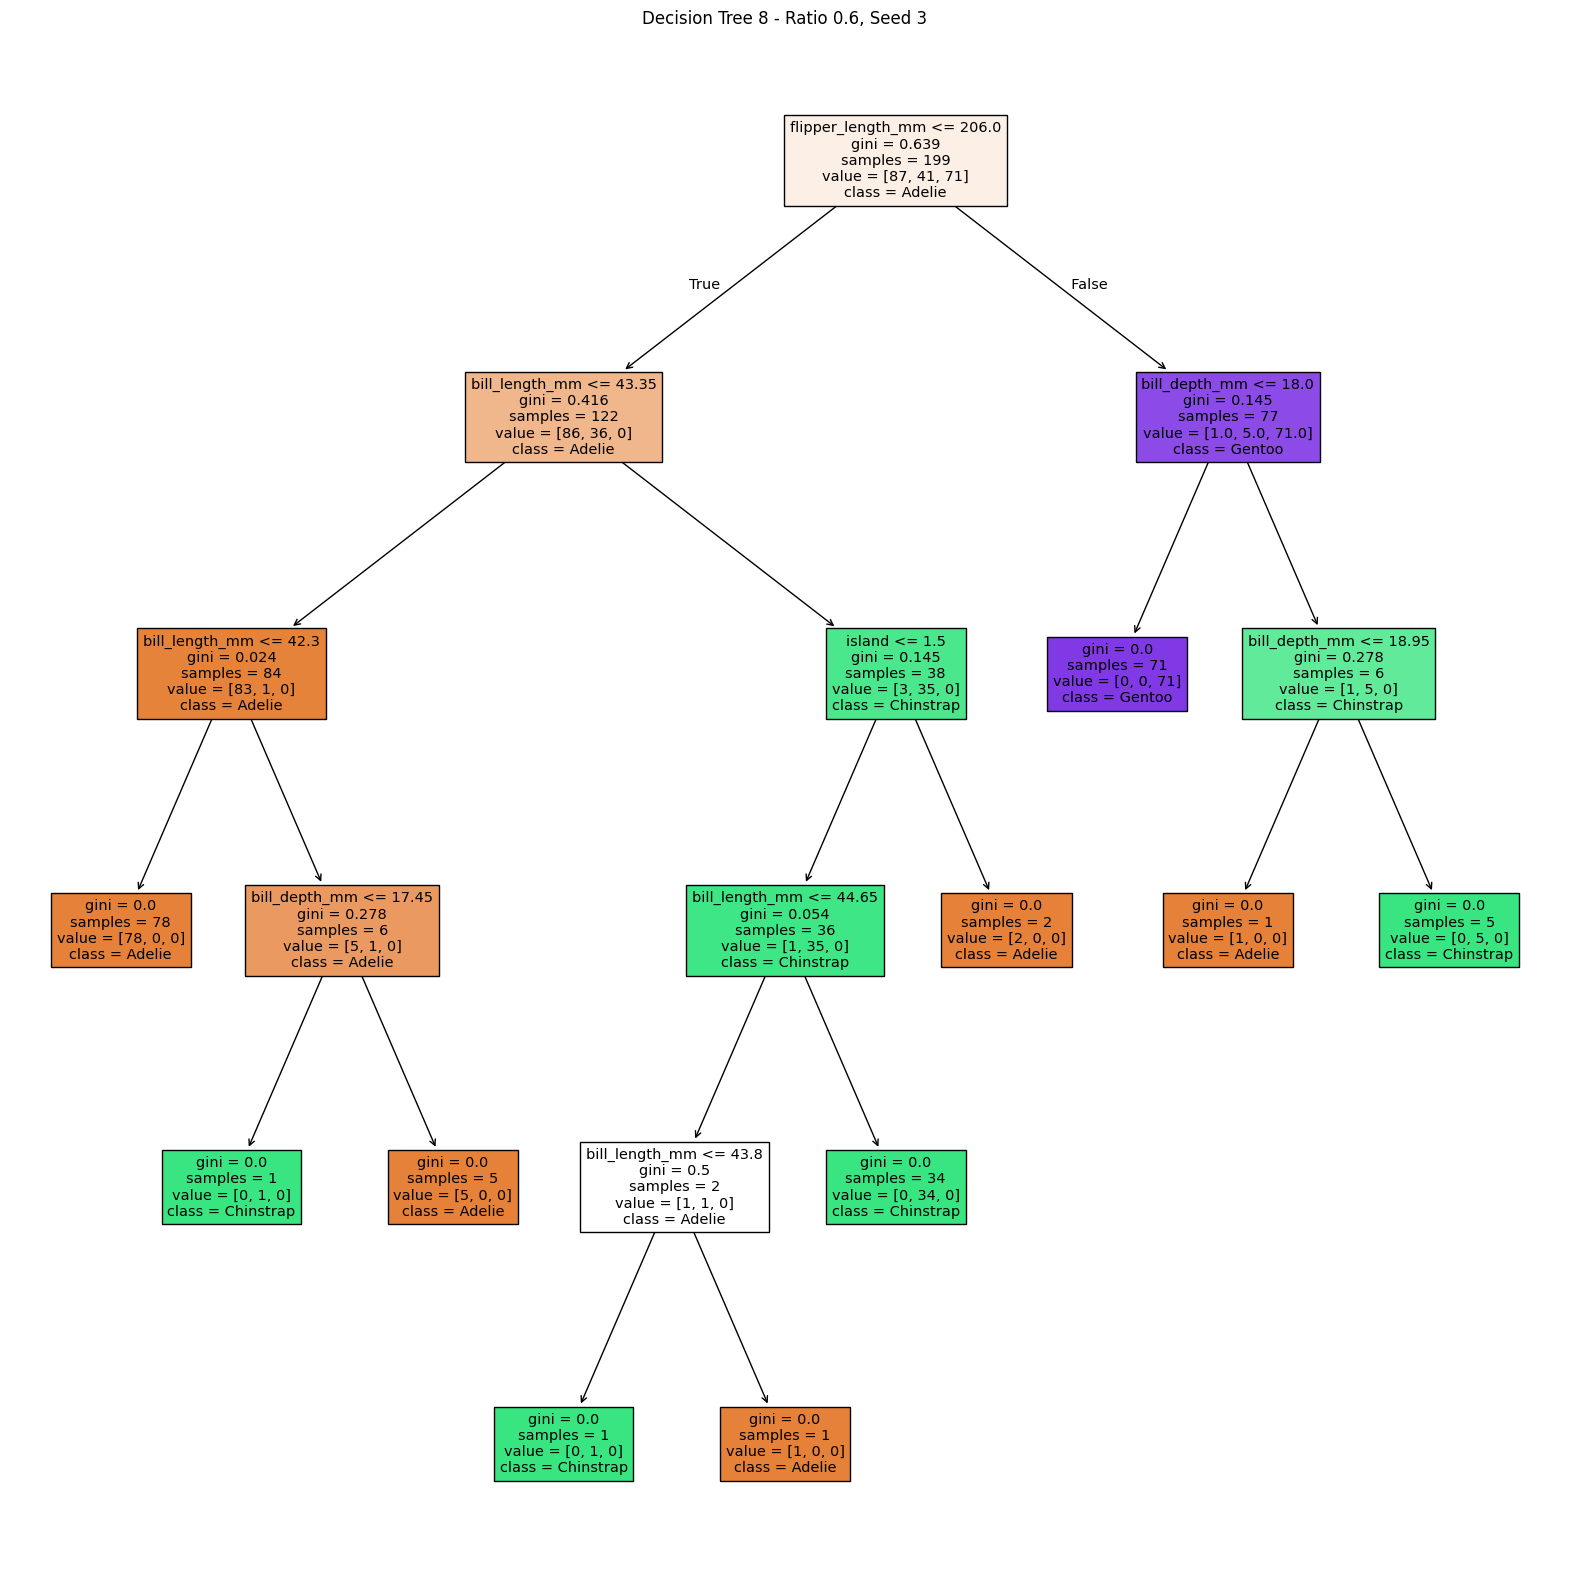

Dataset 9: Accuracy (0.8 split, seed 0): 0.9402985074626866
Classification Report for Dataset 9:
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.96        29
   Chinstrap       0.81      0.93      0.87        14
      Gentoo       0.96      0.96      0.96        24

    accuracy                           0.94        67
   macro avg       0.92      0.94      0.93        67
weighted avg       0.95      0.94      0.94        67



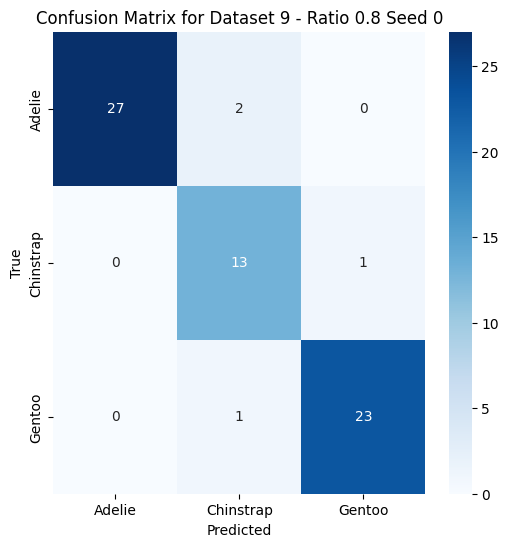

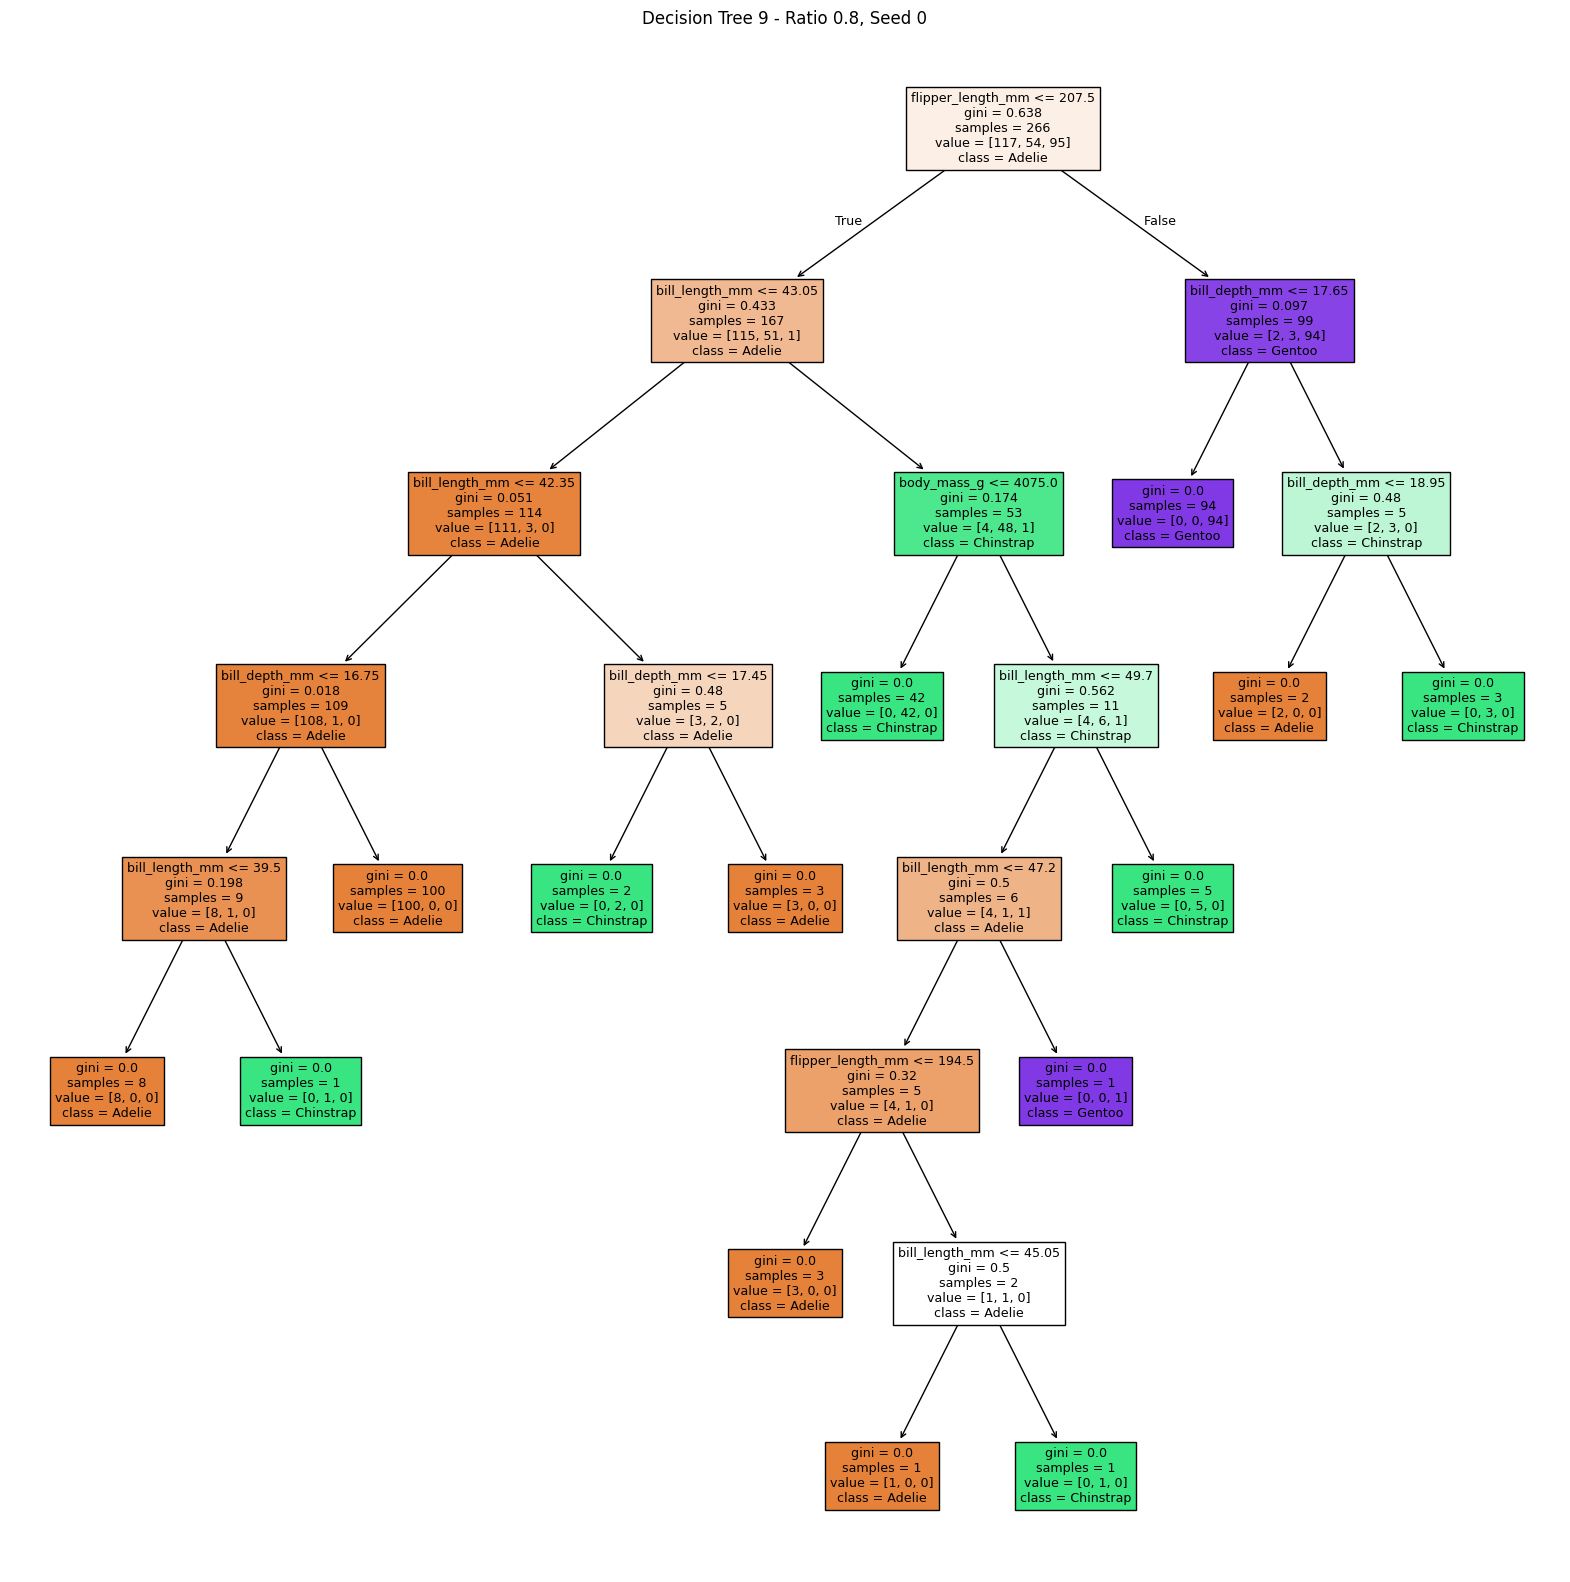

Dataset 10: Accuracy (0.8 split, seed 1): 1.0
Classification Report for Dataset 10:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



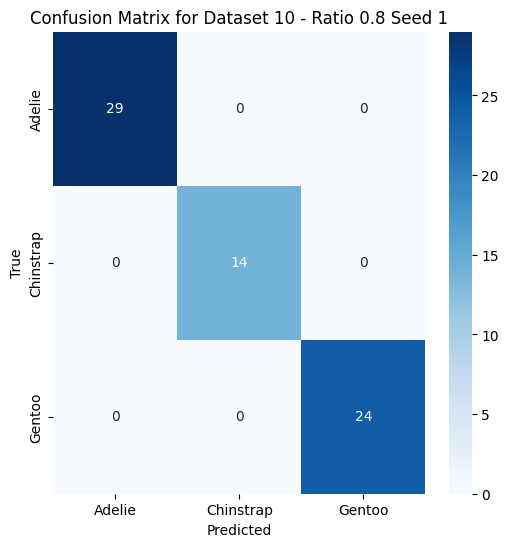

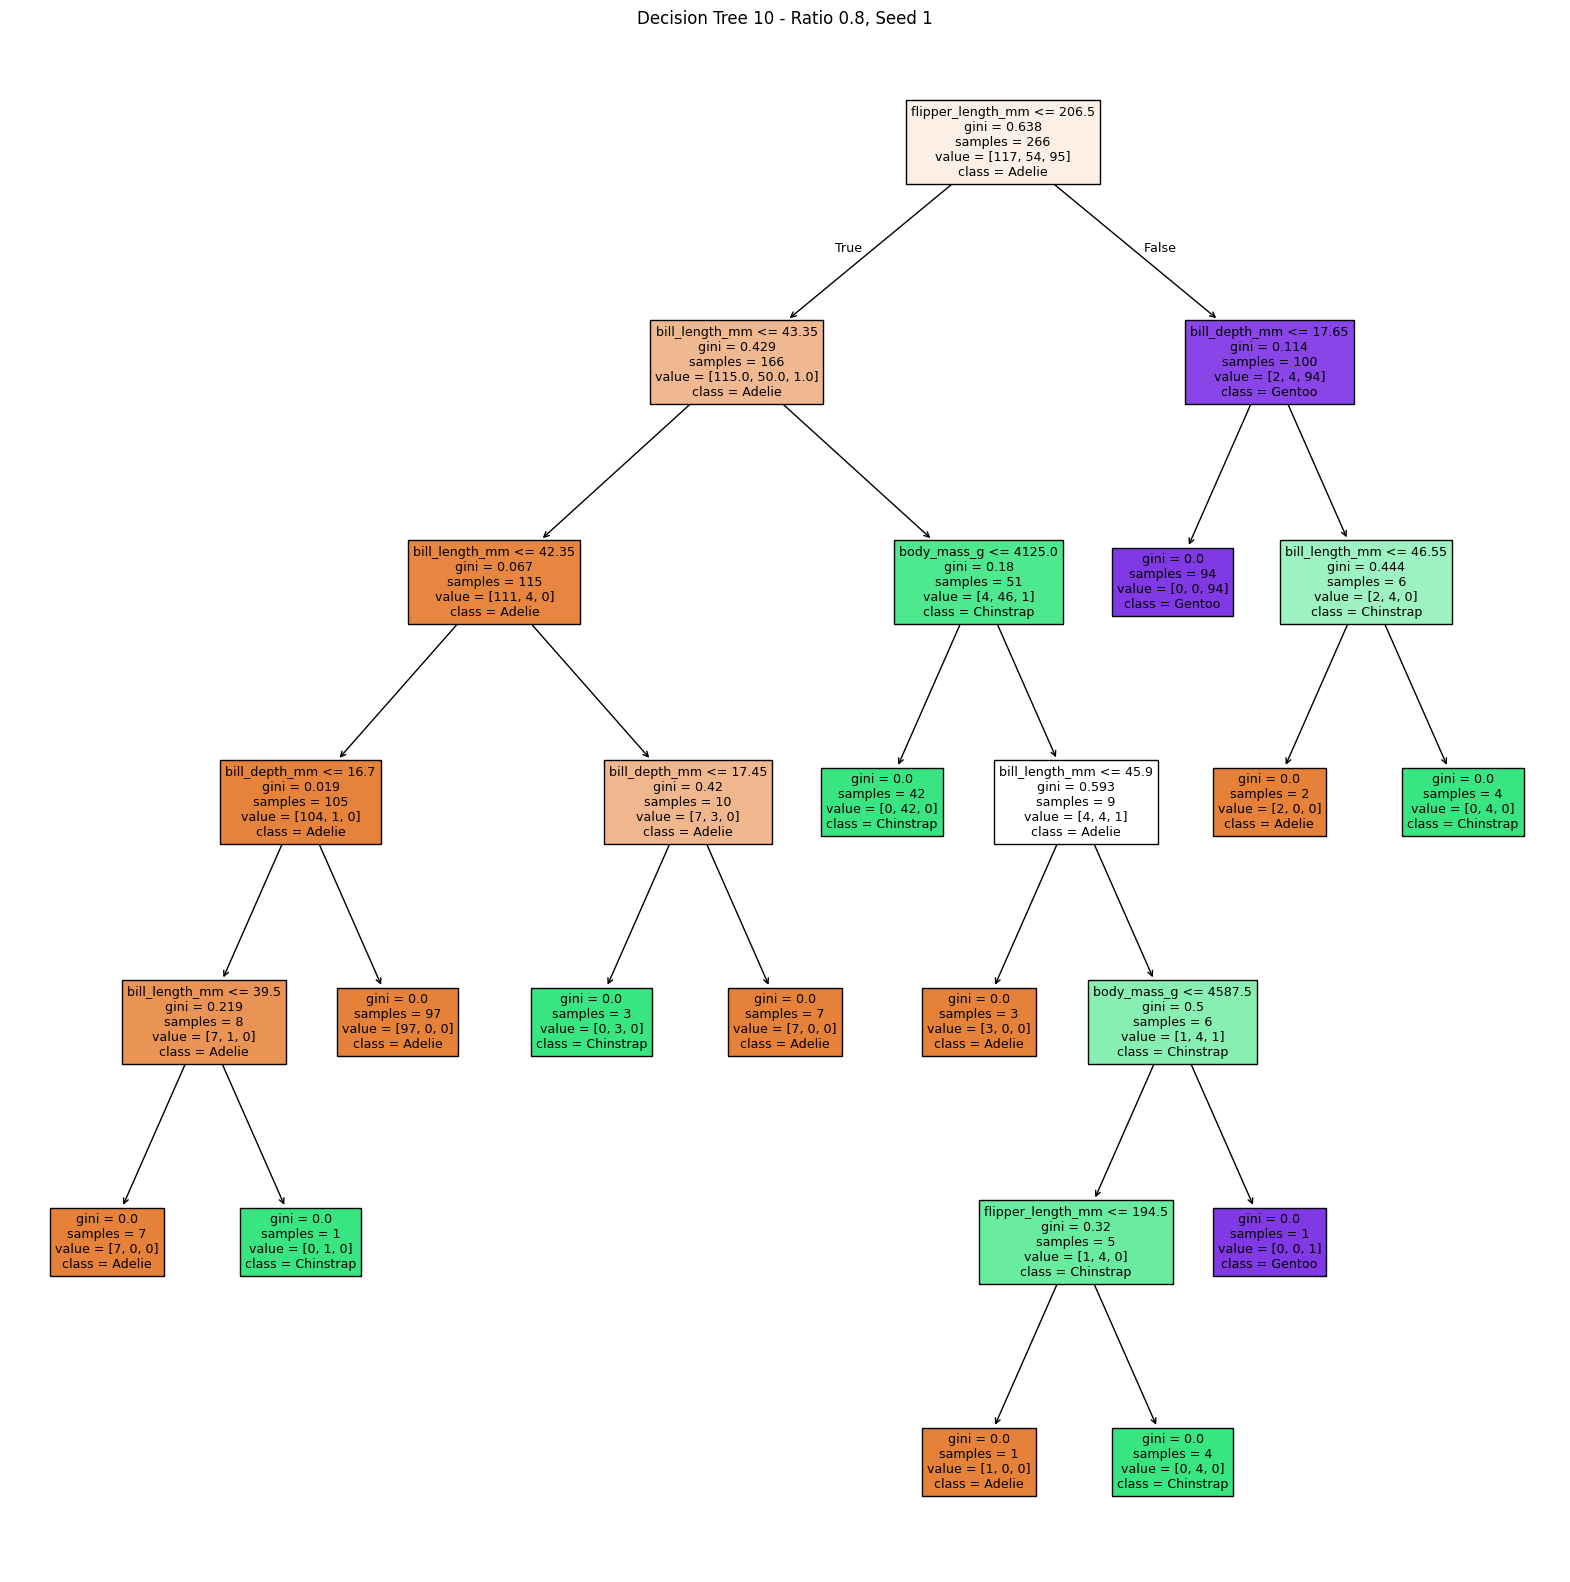

Dataset 11: Accuracy (0.8 split, seed 2): 0.9701492537313433
Classification Report for Dataset 11:
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        29
   Chinstrap       0.93      0.93      0.93        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67



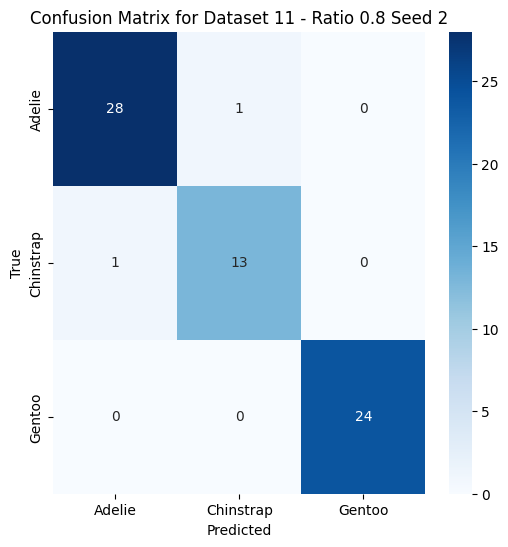

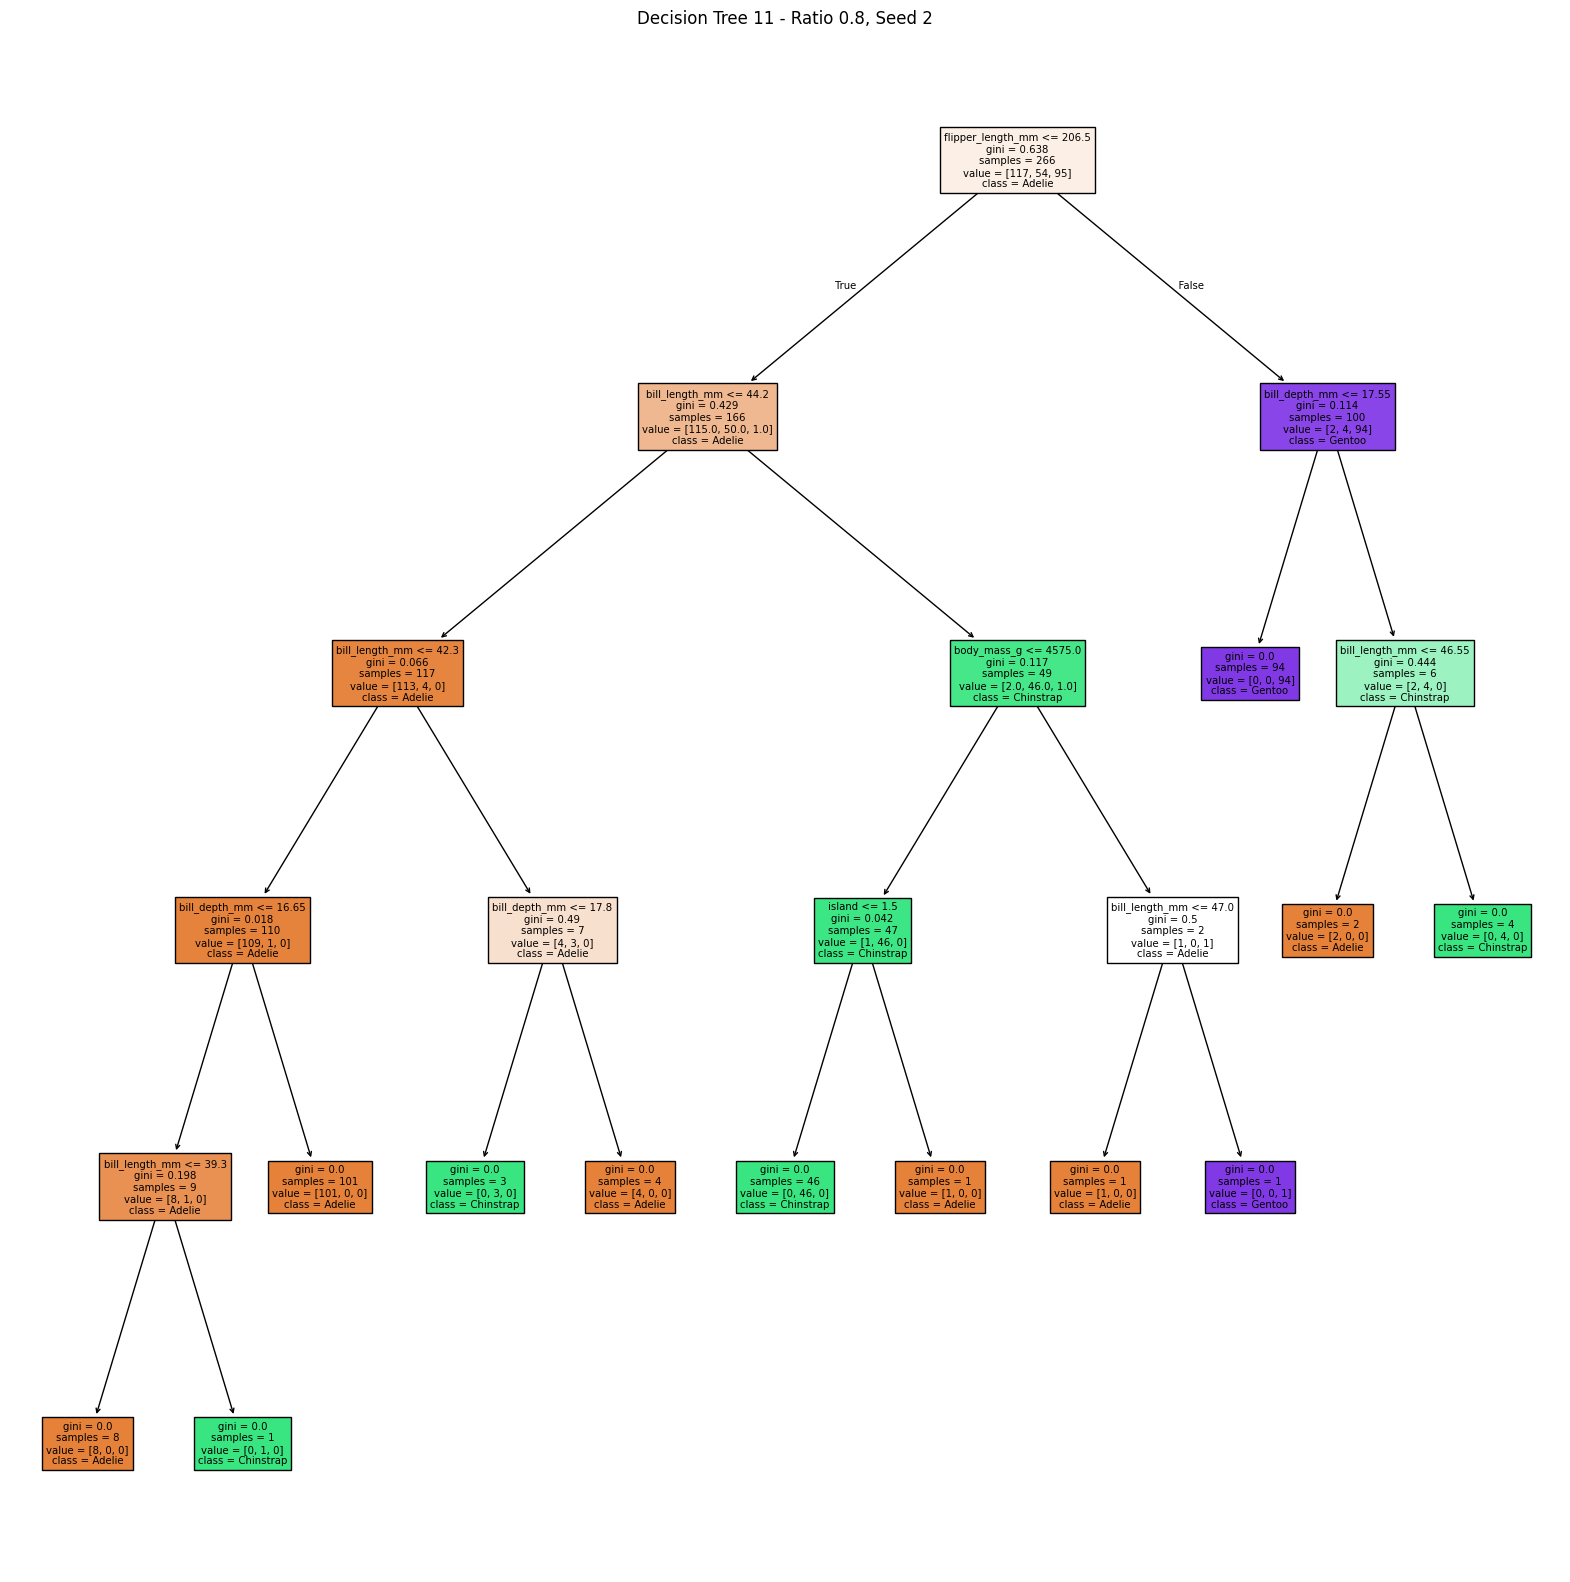

Dataset 12: Accuracy (0.8 split, seed 3): 0.9850746268656716
Classification Report for Dataset 12:
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        29
   Chinstrap       1.00      0.93      0.96        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67



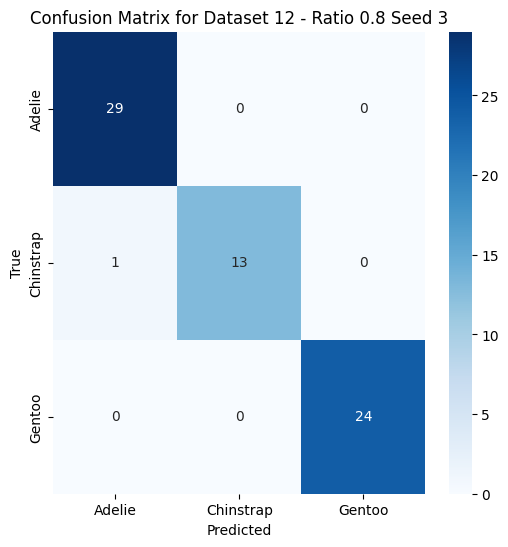

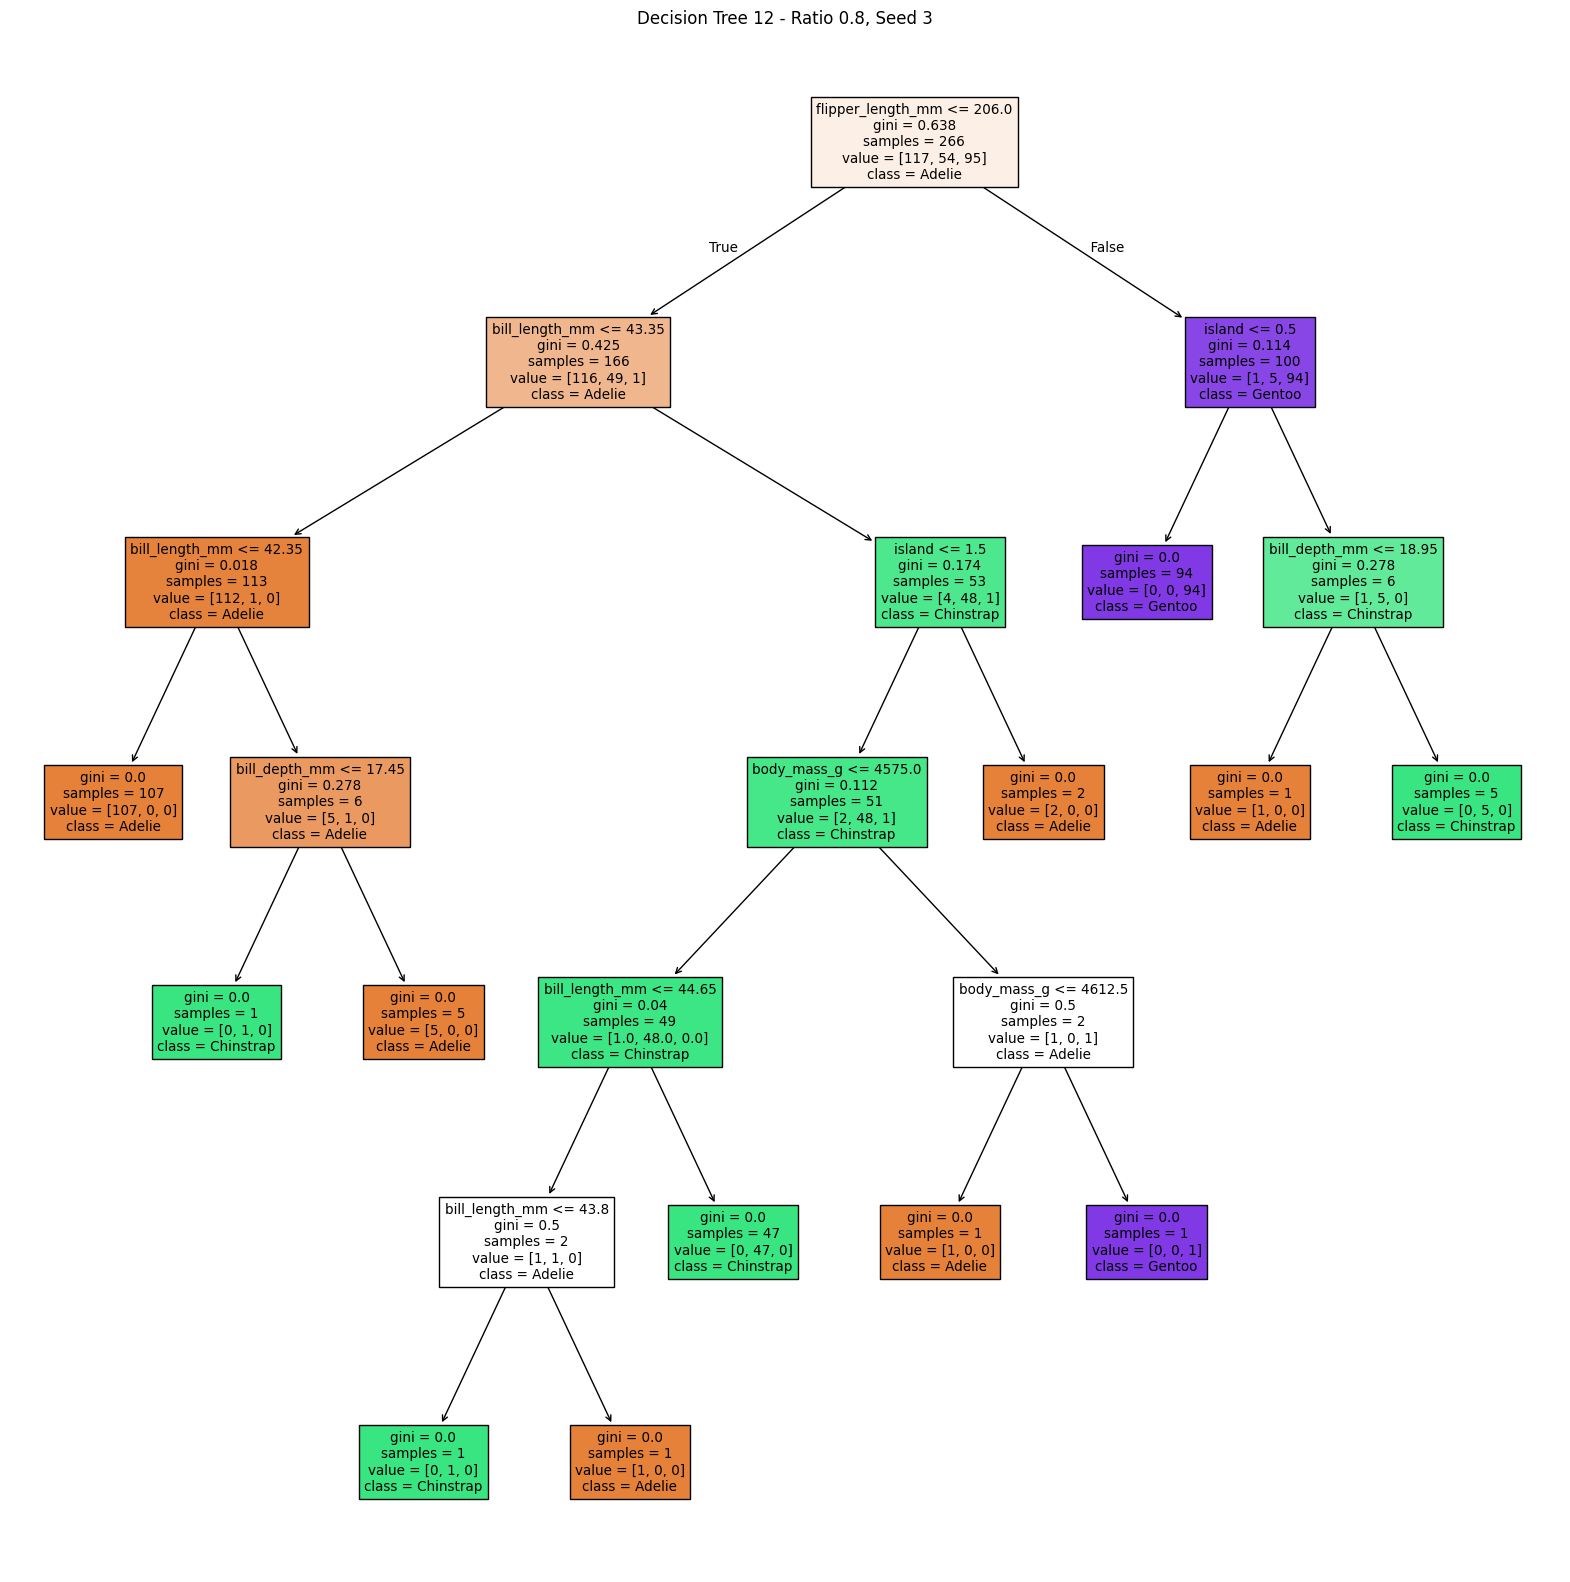

Dataset 13: Accuracy (0.9 split, seed 0): 0.9411764705882353
Classification Report for Dataset 13:
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        15
   Chinstrap       0.86      0.86      0.86         7
      Gentoo       0.92      1.00      0.96        12

    accuracy                           0.94        34
   macro avg       0.93      0.93      0.93        34
weighted avg       0.94      0.94      0.94        34



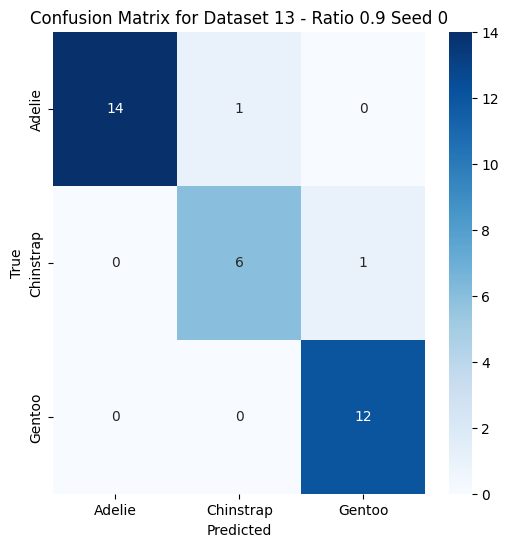

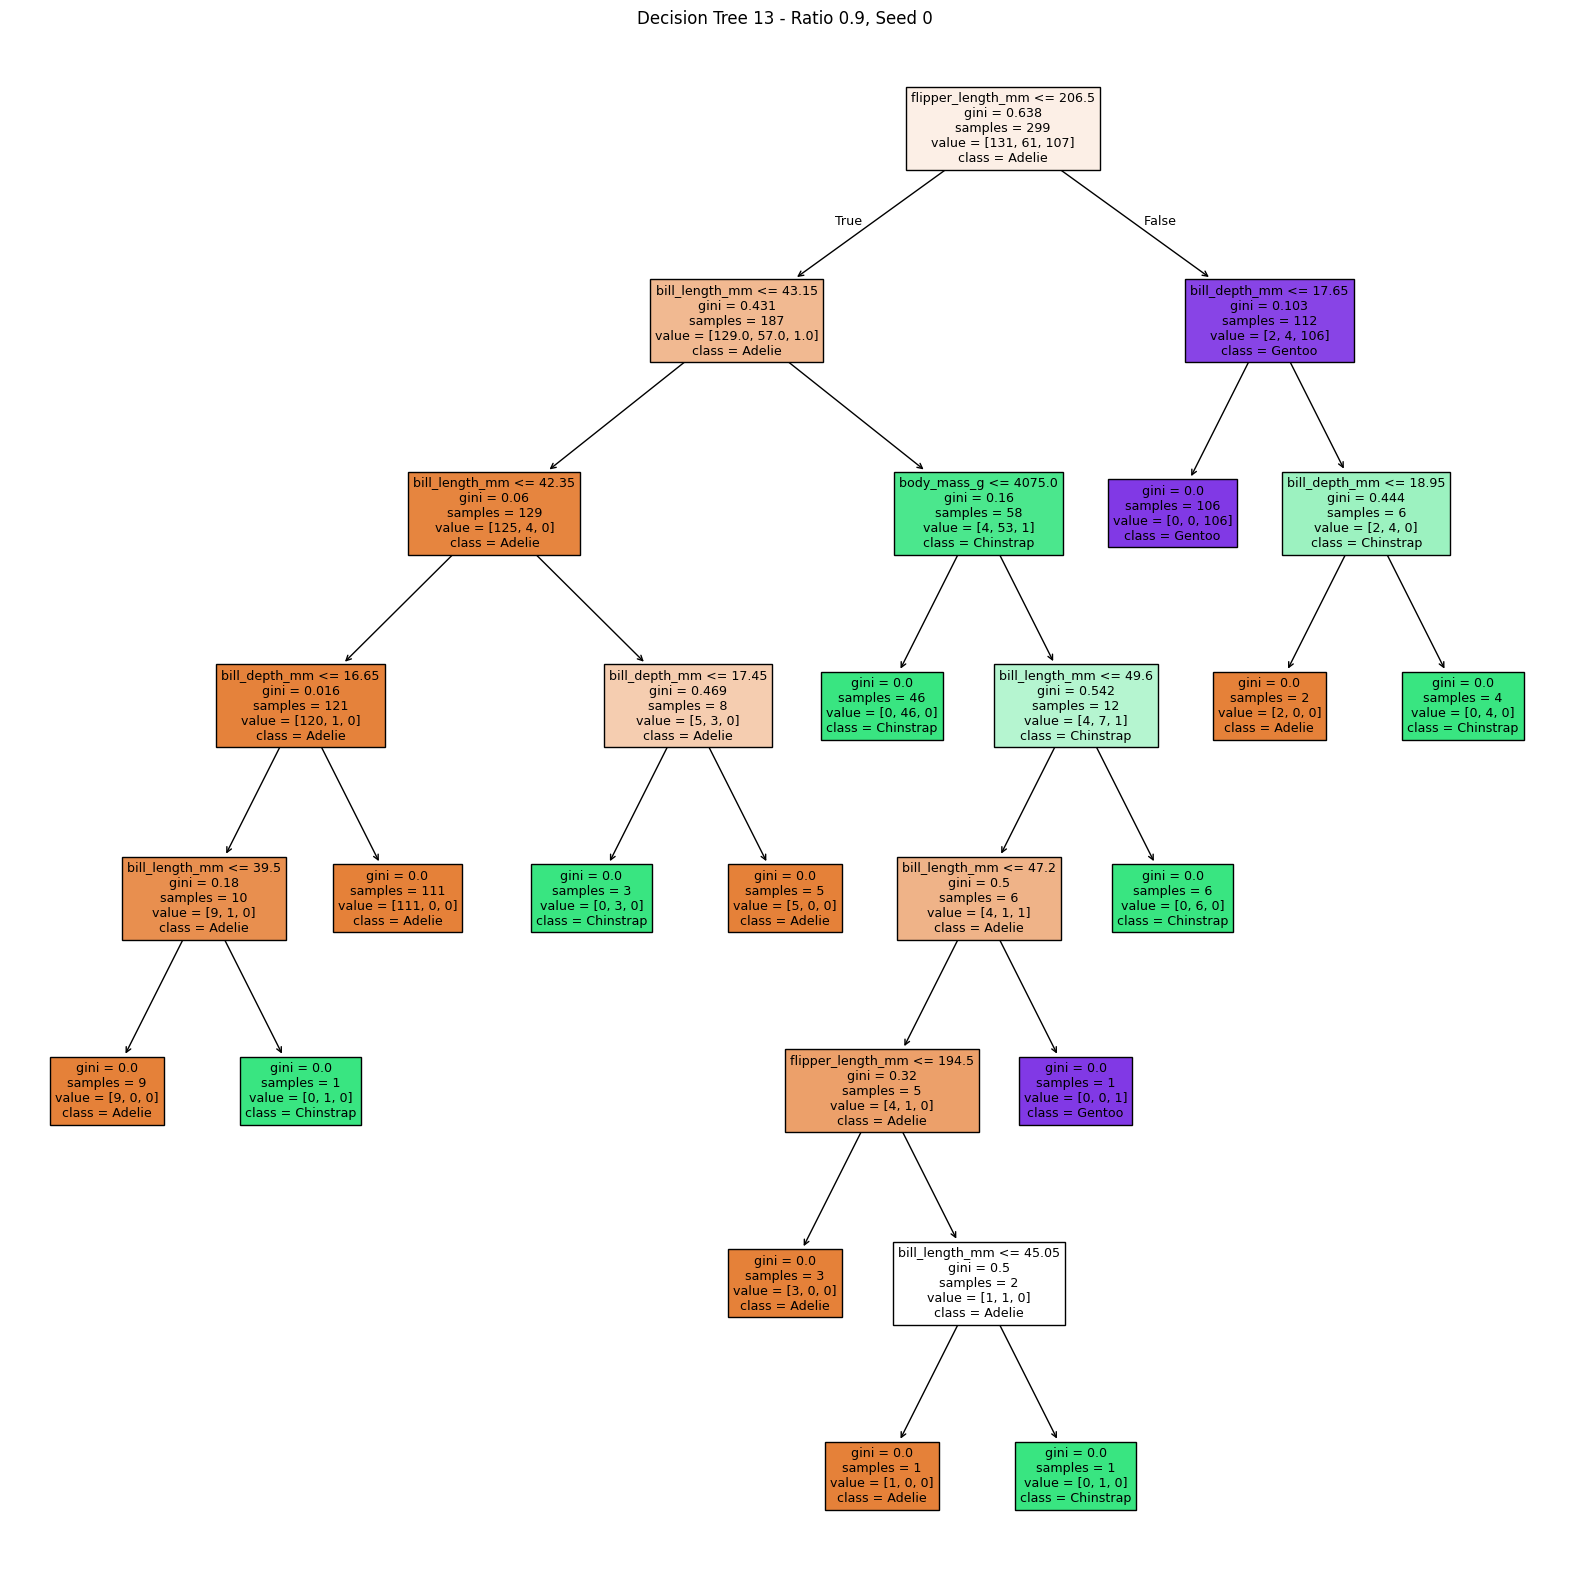

Dataset 14: Accuracy (0.9 split, seed 1): 1.0
Classification Report for Dataset 14:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      1.00      1.00        12

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



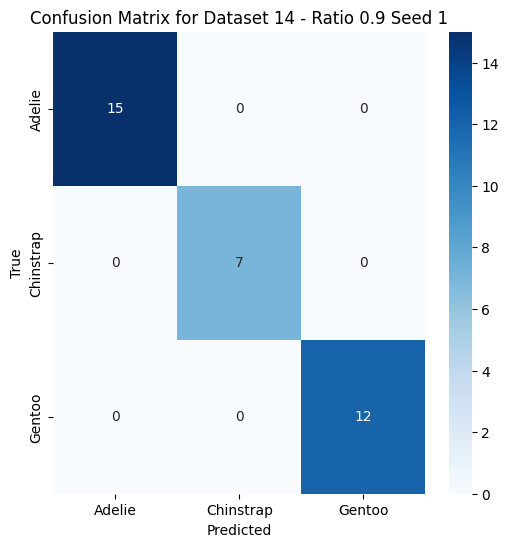

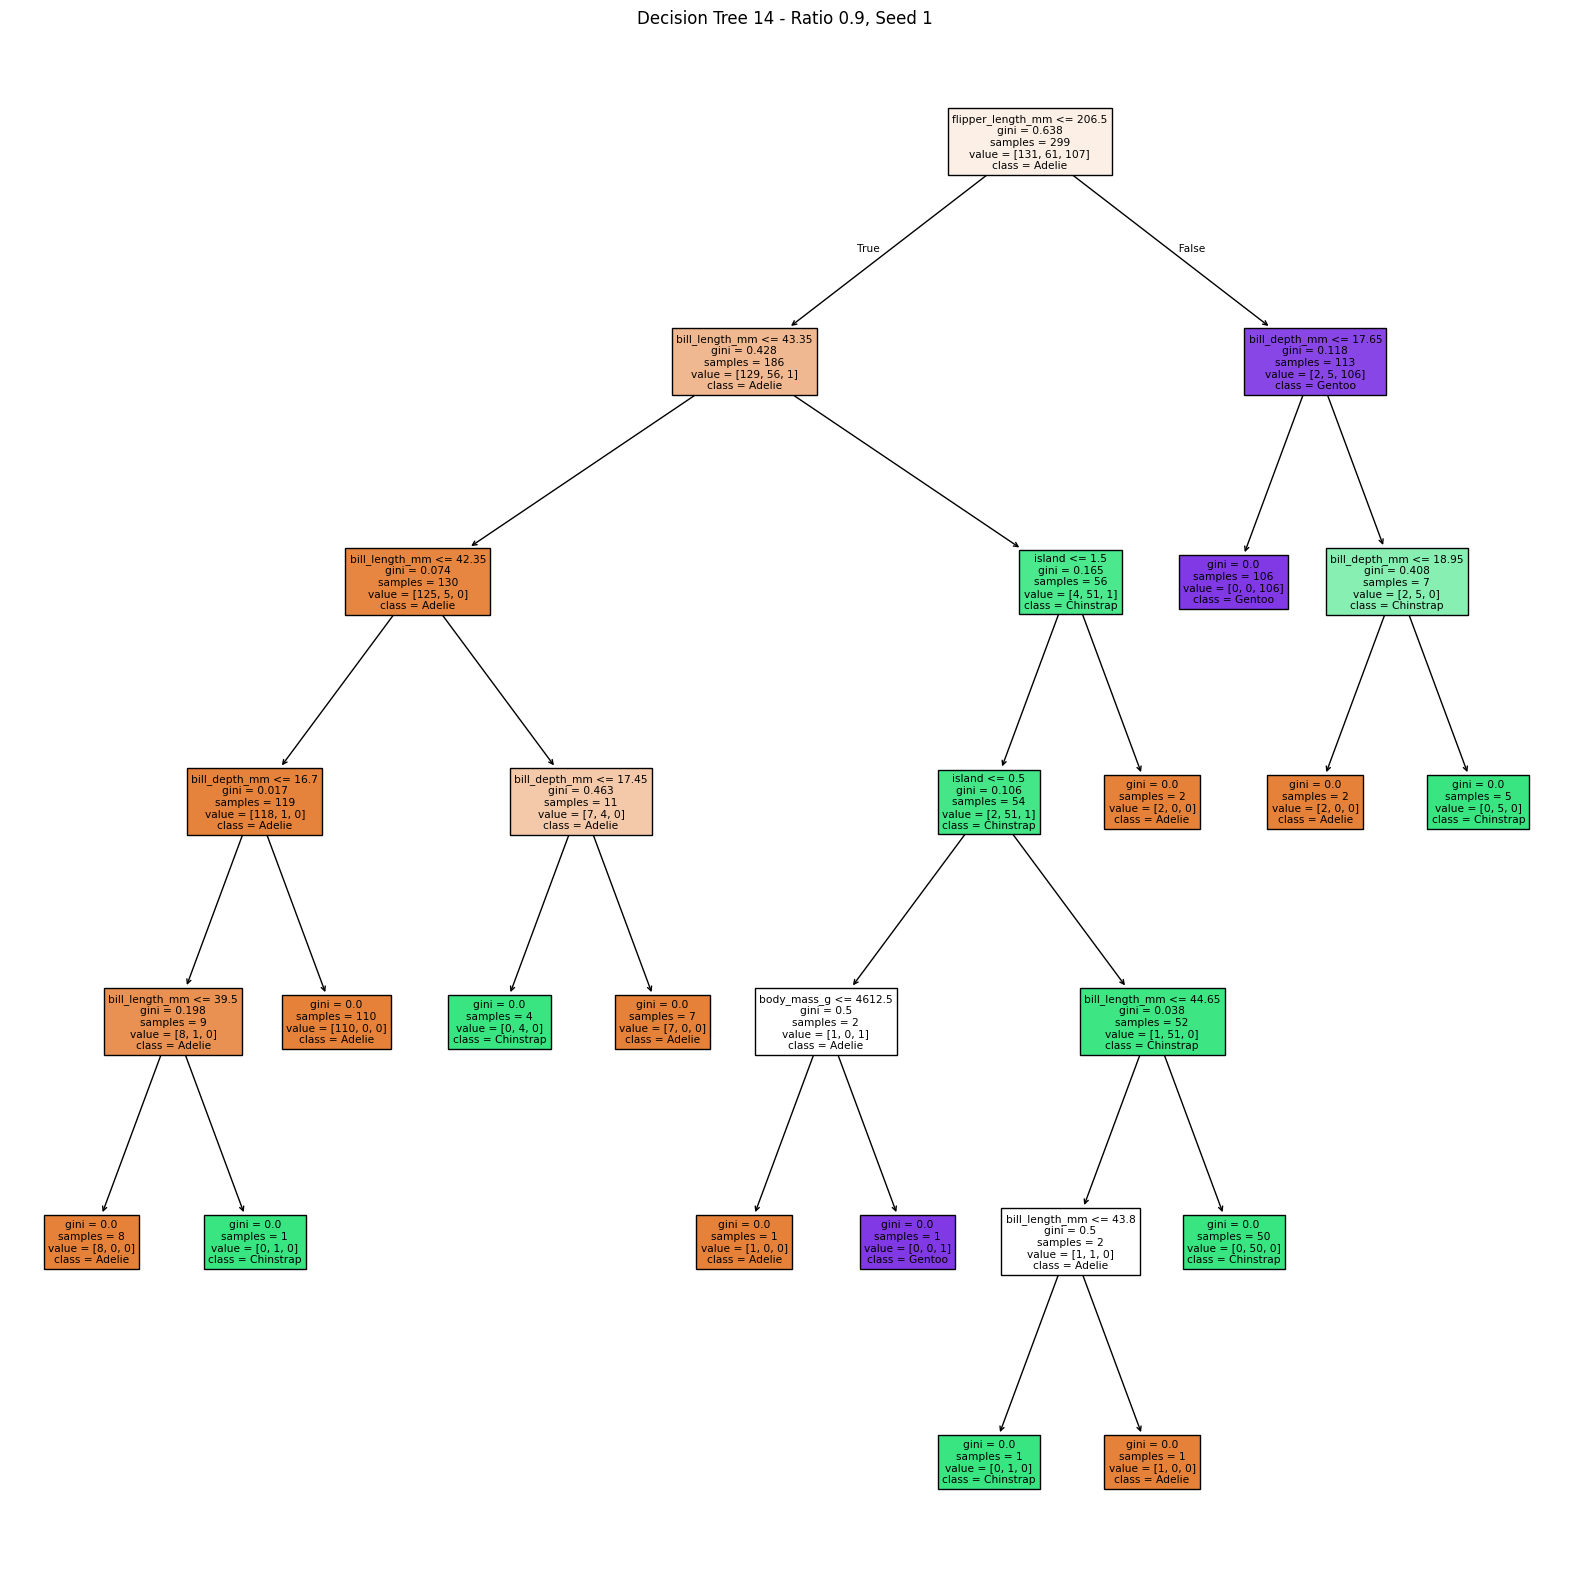

Dataset 15: Accuracy (0.9 split, seed 2): 0.9705882352941176
Classification Report for Dataset 15:
              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        15
   Chinstrap       0.88      1.00      0.93         7
      Gentoo       1.00      1.00      1.00        12

    accuracy                           0.97        34
   macro avg       0.96      0.98      0.97        34
weighted avg       0.97      0.97      0.97        34



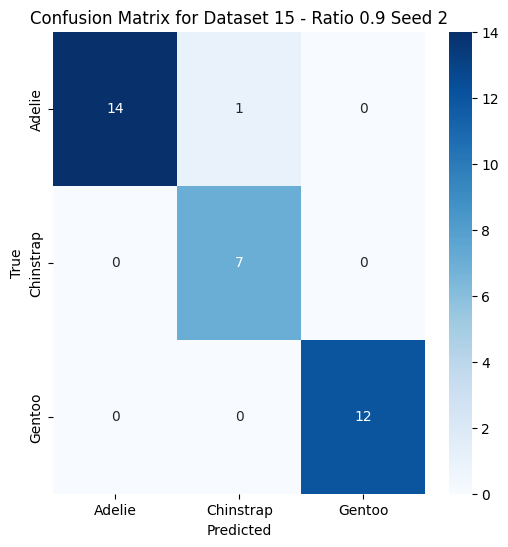

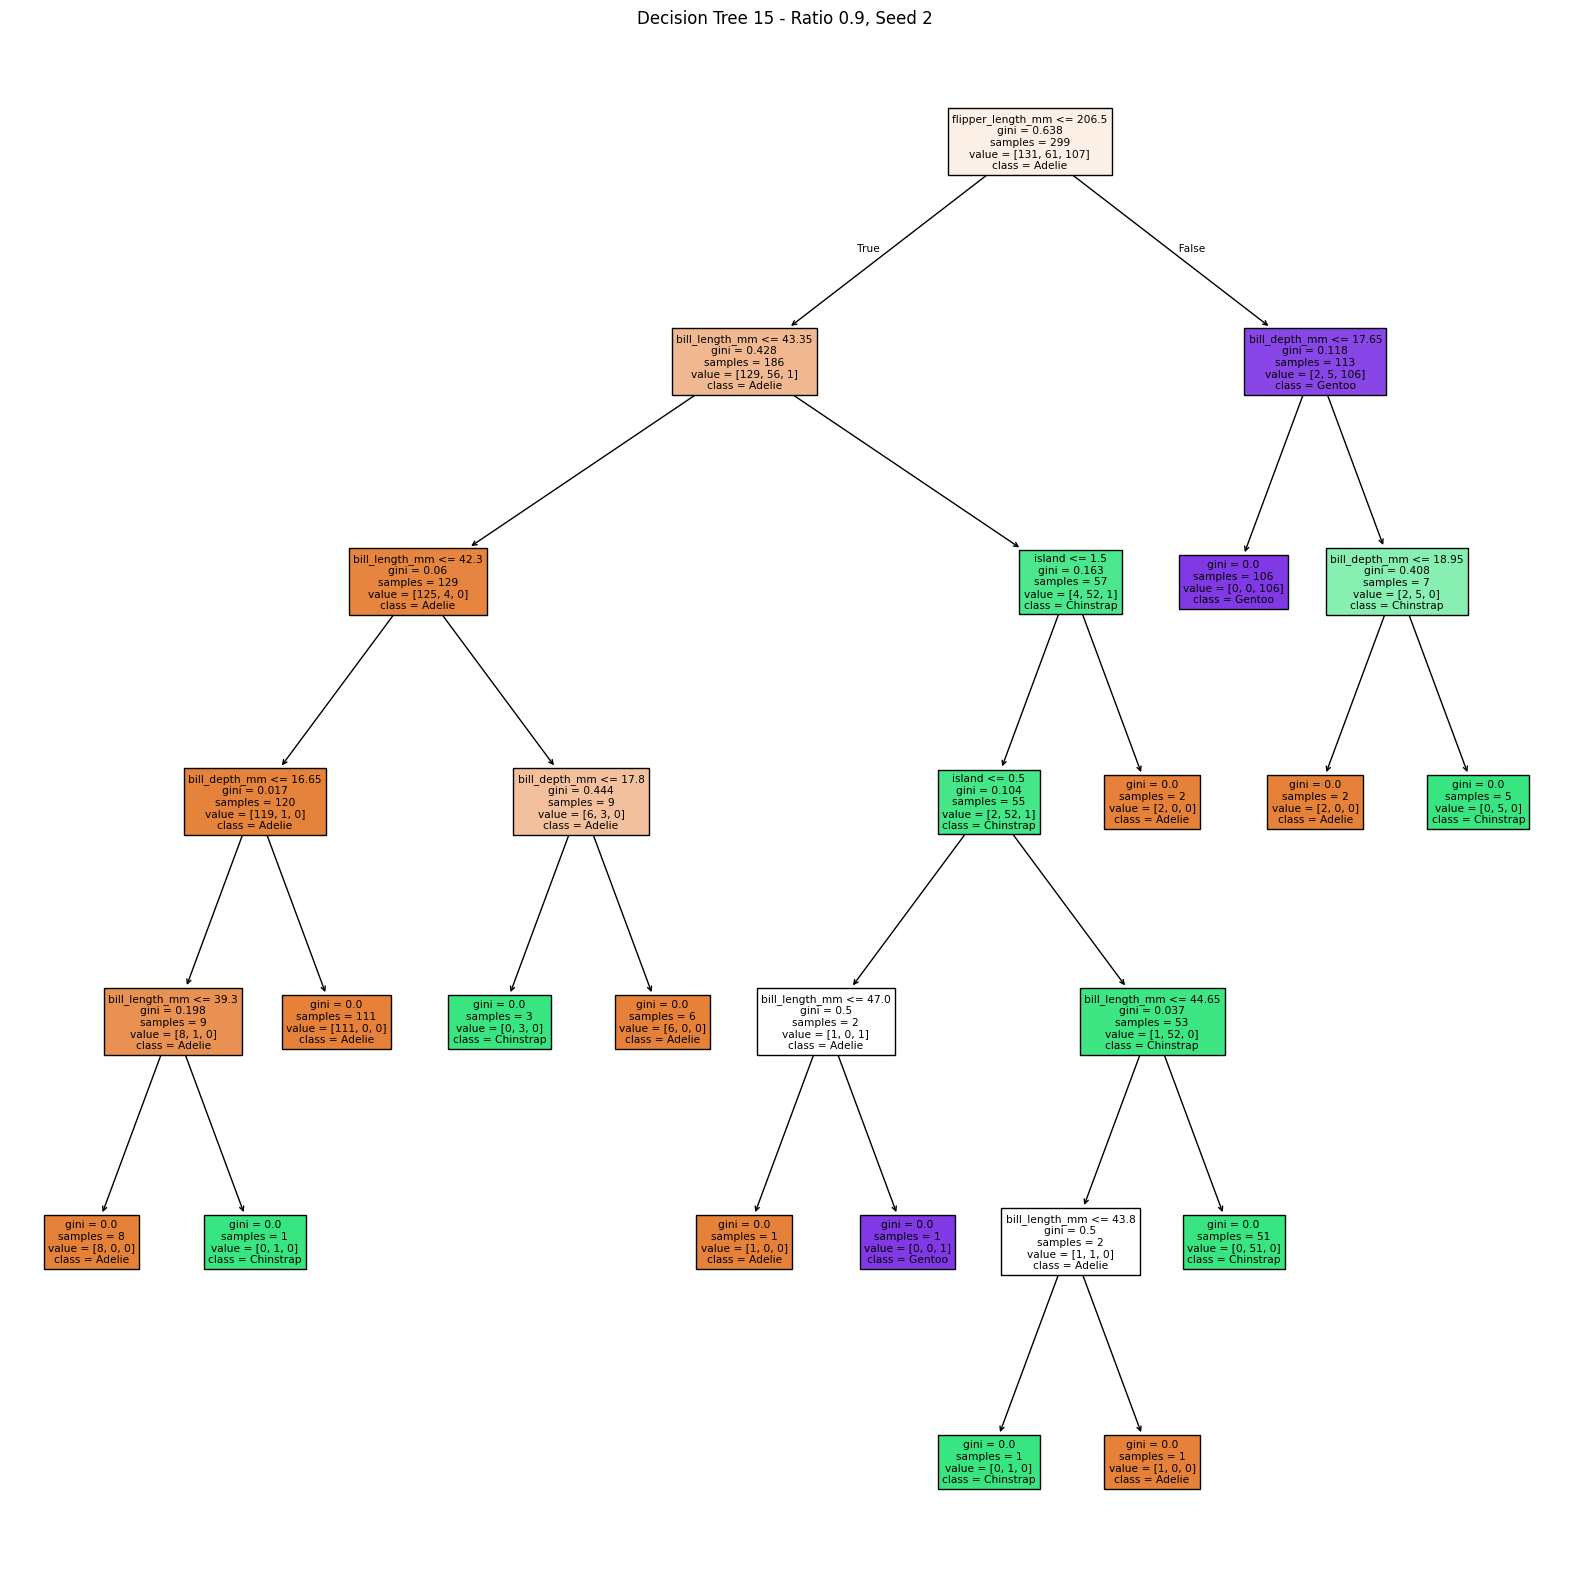

Dataset 16: Accuracy (0.9 split, seed 3): 0.9411764705882353
Classification Report for Dataset 16:
              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        15
   Chinstrap       0.86      0.86      0.86         7
      Gentoo       1.00      1.00      1.00        12

    accuracy                           0.94        34
   macro avg       0.93      0.93      0.93        34
weighted avg       0.94      0.94      0.94        34



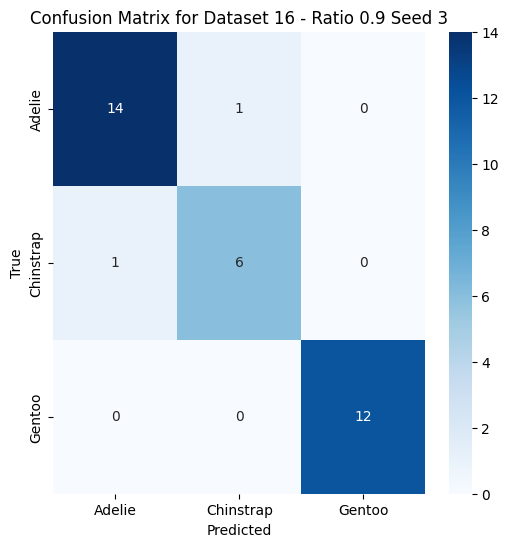

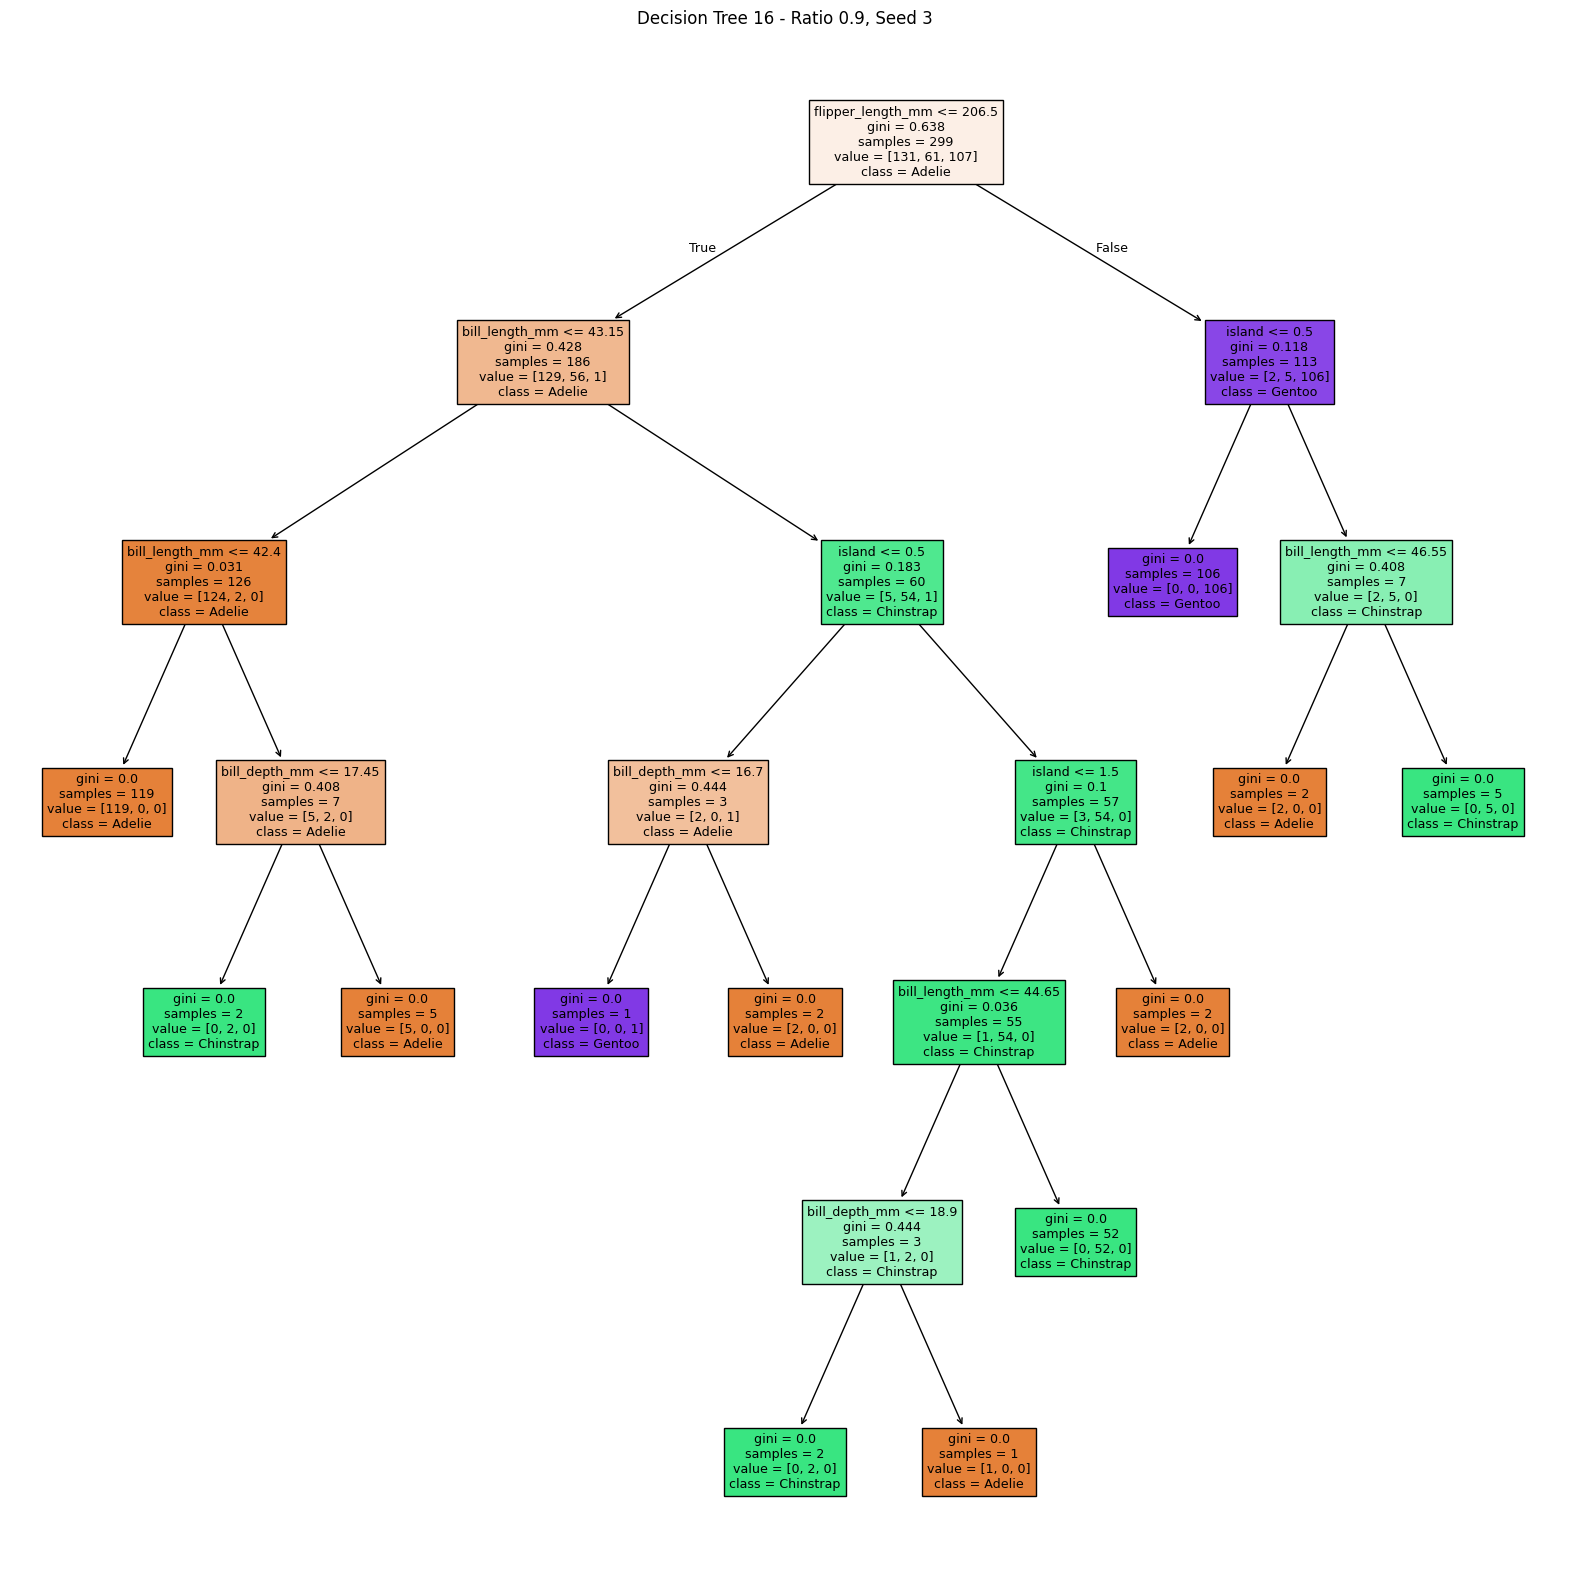

In [ ]:
# Duyệt qua các bộ dữ liệu trong danh sách 'datasets'
for i, example in enumerate(datasets):
    # Tạo mô hình DecisionTreeClassifier với random_state là seed của bộ dữ liệu
    model = DecisionTreeClassifier(random_state=example['seed'])
    
    # Huấn luyện mô hình với dữ liệu huấn luyện
    model.fit(example['feature_train'], example['label_train'])
    
    # Dự đoán kết quả trên bộ dữ liệu kiểm tra
    y_pred = model.predict(example['feature_test'])
    
    # Tính độ chính xác của mô hình
    accuracy = accuracy_score(example['label_test'], y_pred)
    print(f"Dataset {i+1}: Accuracy ({example['ratio']} split, seed {example['seed']}):", accuracy)
    
    # In ra báo cáo phân loại (classification report)
    print(f"Classification Report for Dataset {i+1}:")
    print(classification_report(example['label_test'], y_pred))
    
    # Tính và hiển thị ma trận nhầm lẫn (confusion matrix)
    cm = confusion_matrix(example['label_test'], y_pred)
    
    # Vẽ ma trận nhầm lẫn dưới dạng heatmap
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)  # Hiển thị ma trận nhầm lẫn với colormap Blues
    plt.title(f"Confusion Matrix for Dataset {i+1} - Ratio {example['ratio']} Seed {example['seed']}")
    plt.colorbar()  # Hiển thị thanh màu
    tick_marks = np.arange(len(model.classes_))
    plt.xticks(tick_marks, model.classes_, rotation=45)
    plt.yticks(tick_marks, model.classes_)
    
    # Ghi giá trị vào ma trận nhầm lẫn
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()  # Điều chỉnh bố cục để tránh việc bị cắt bớt
    plt.show()
    
    # Vẽ cây quyết định
    plt.figure(figsize=(20, 20))
    plot_tree(model, 
              feature_names=feature_encoded.columns, 
              class_names=model.classes_, 
              filled=True)
    plt.title(f"Decision Tree {i+1} - Ratio {example['ratio']}, Seed {example['seed']}")
    plt.show()


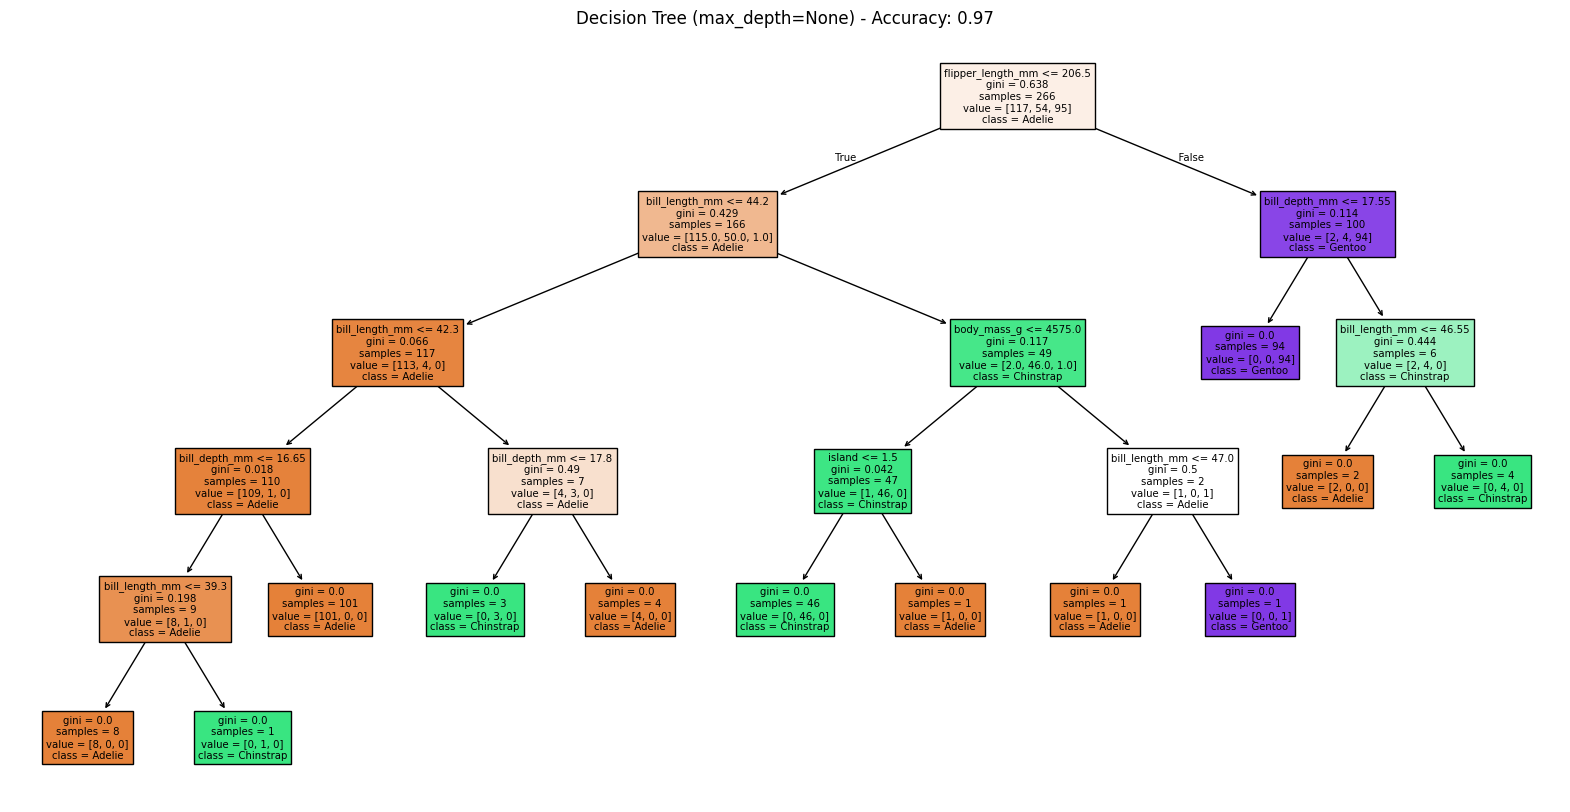

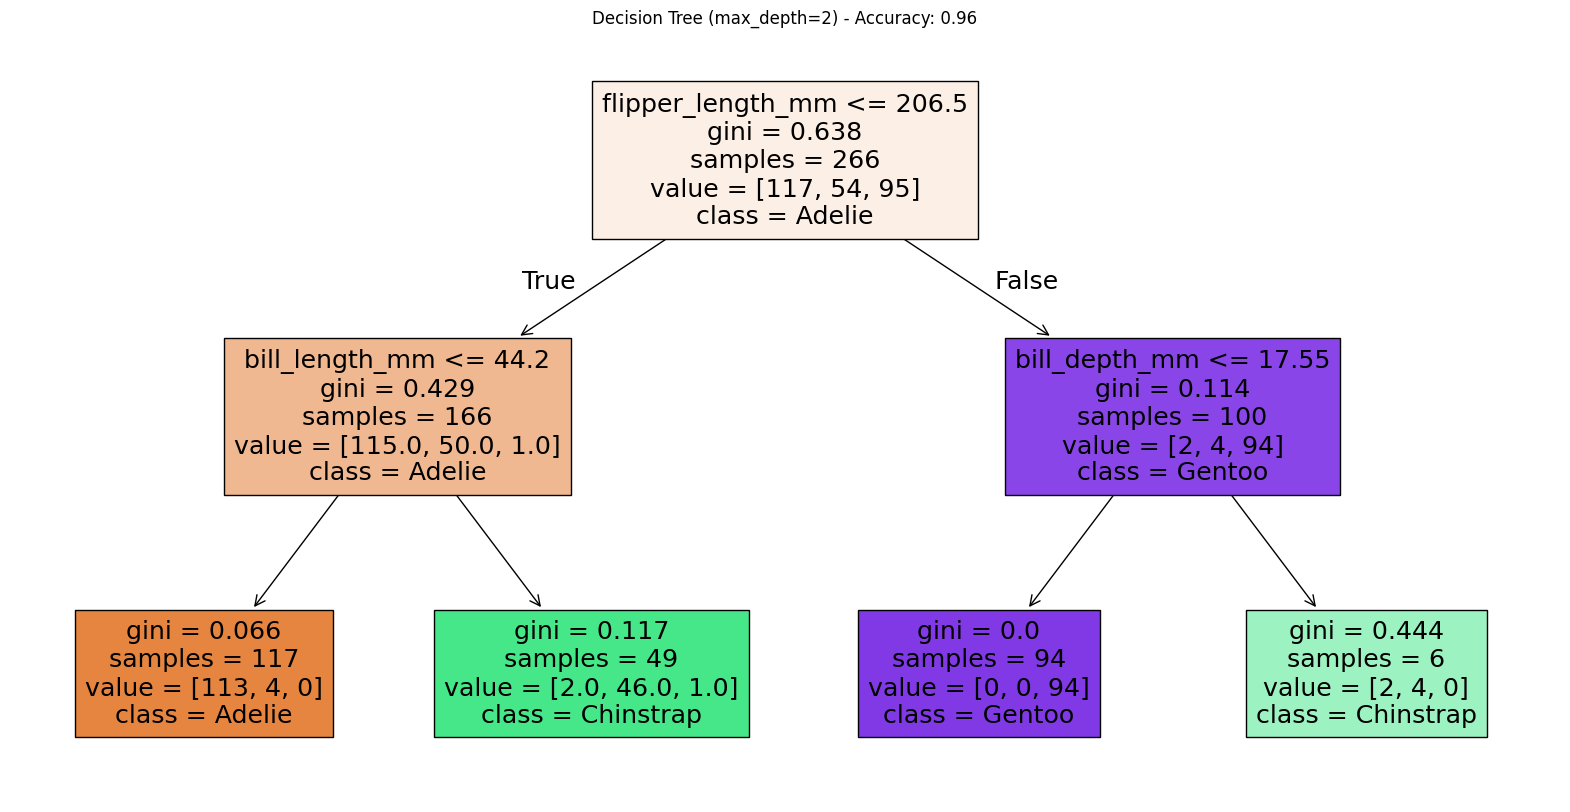

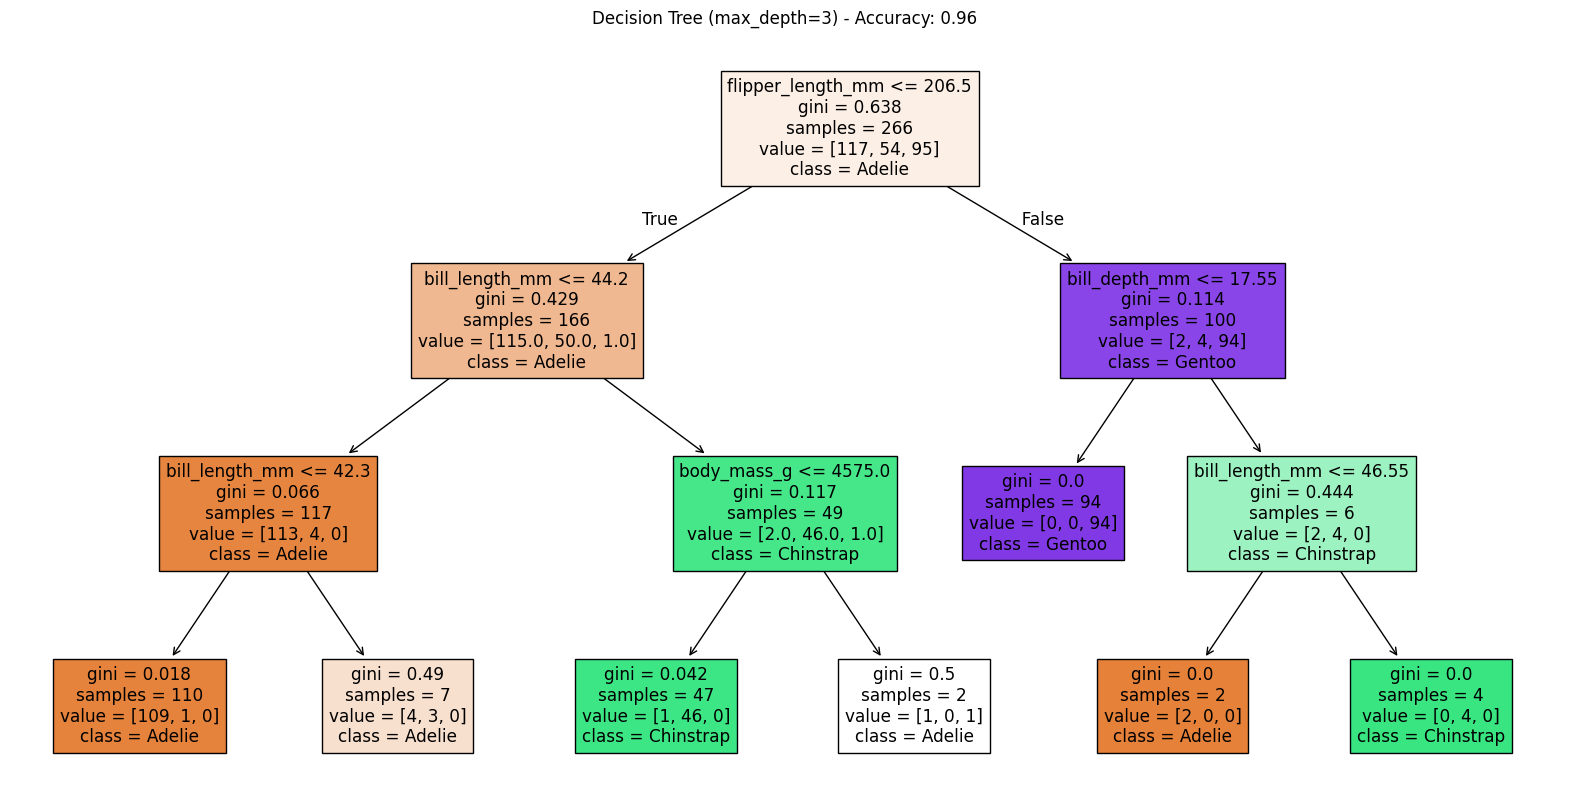

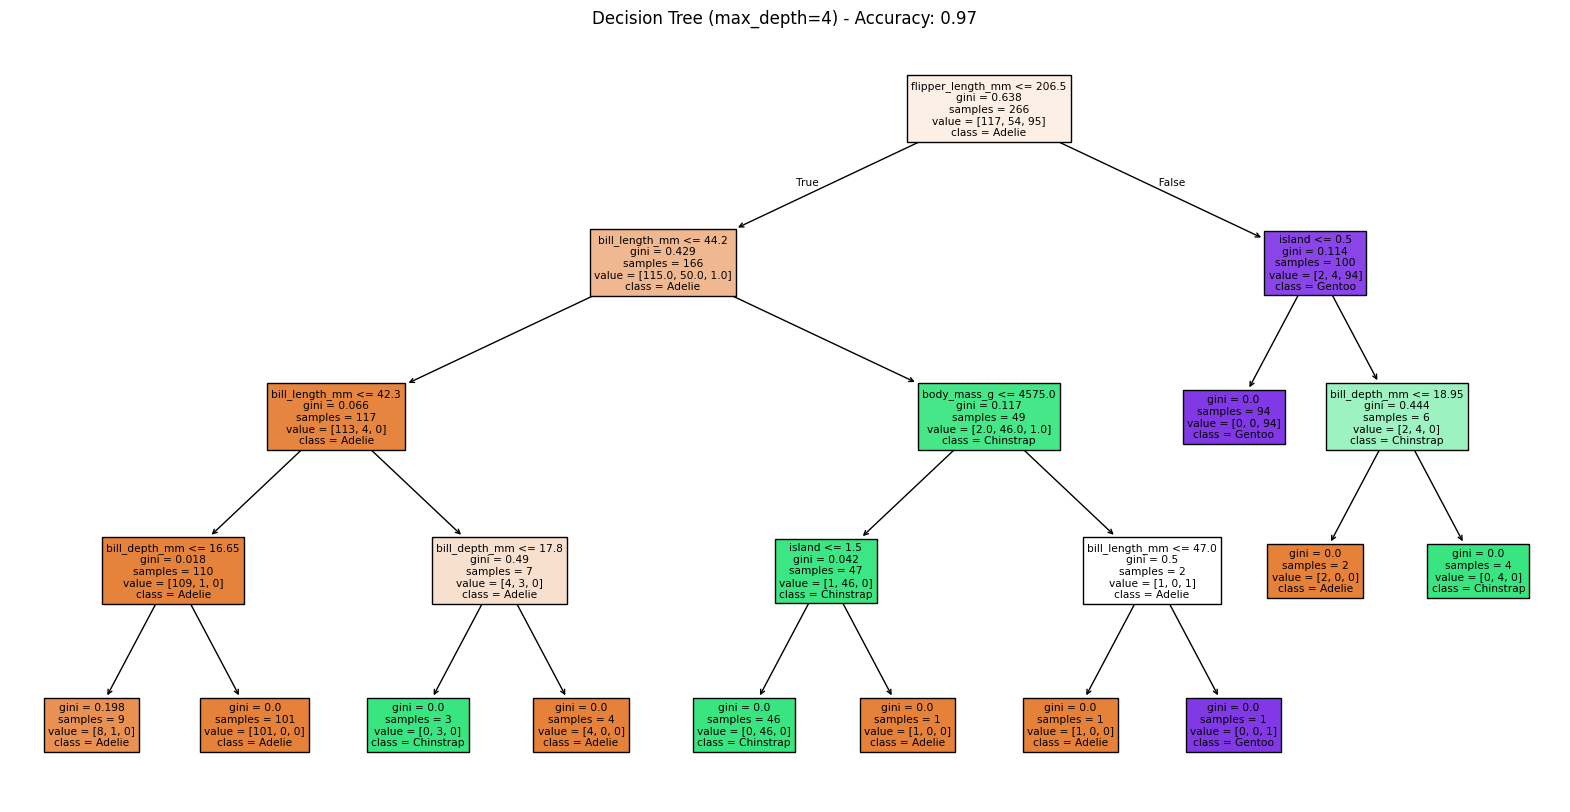

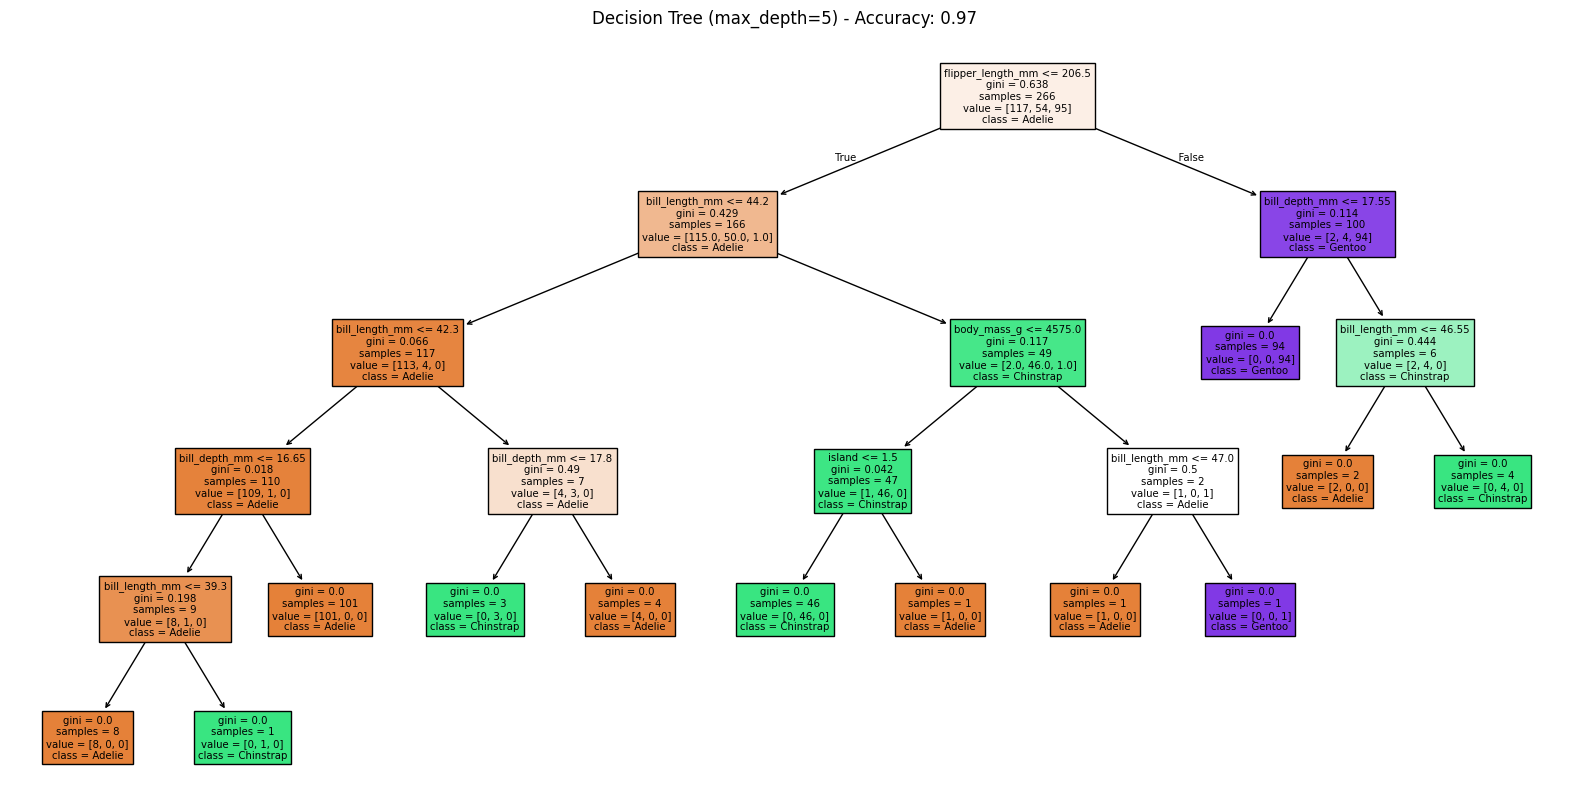

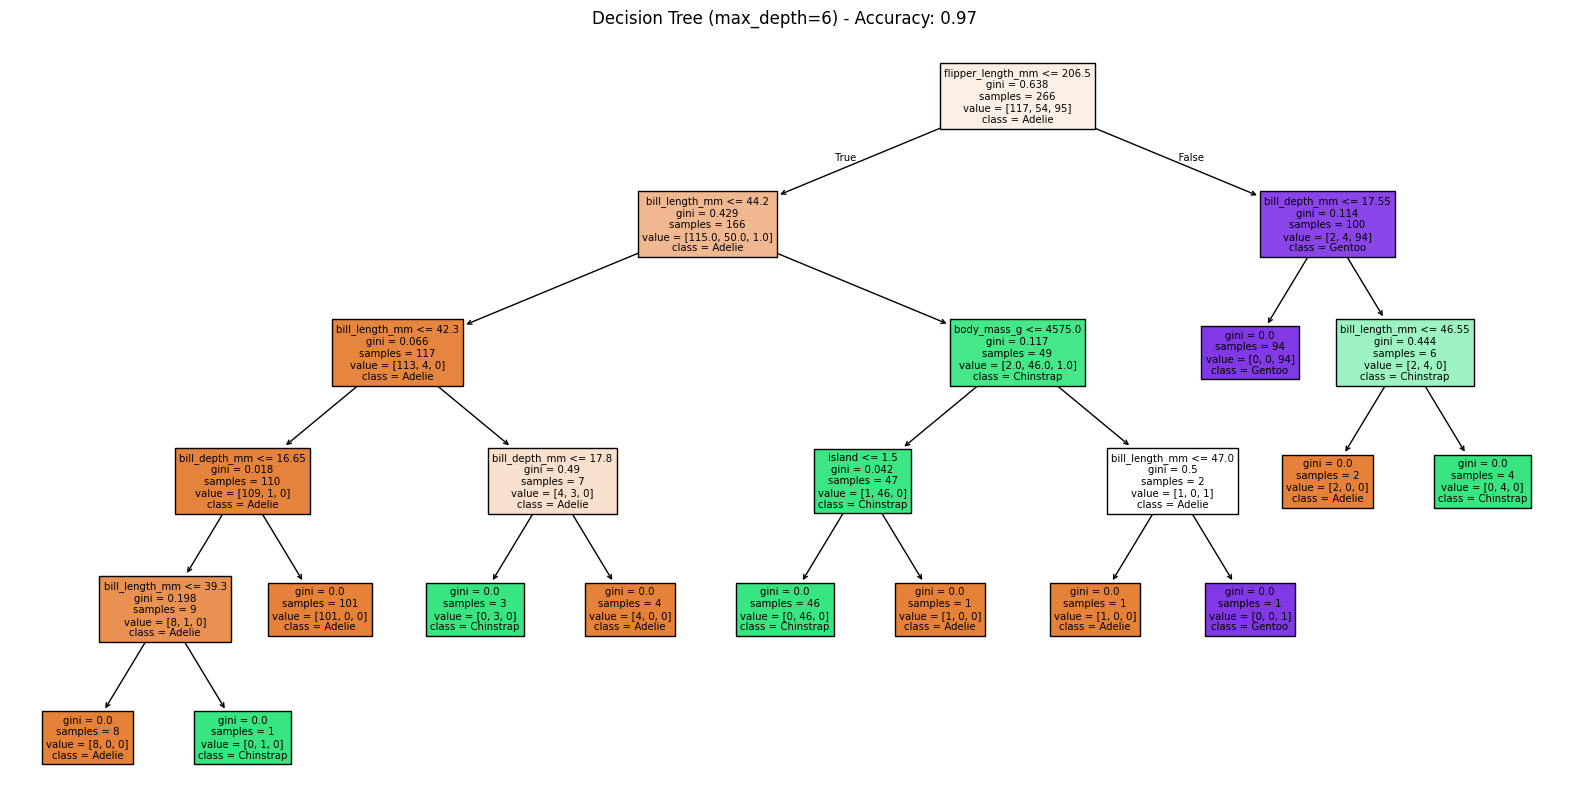

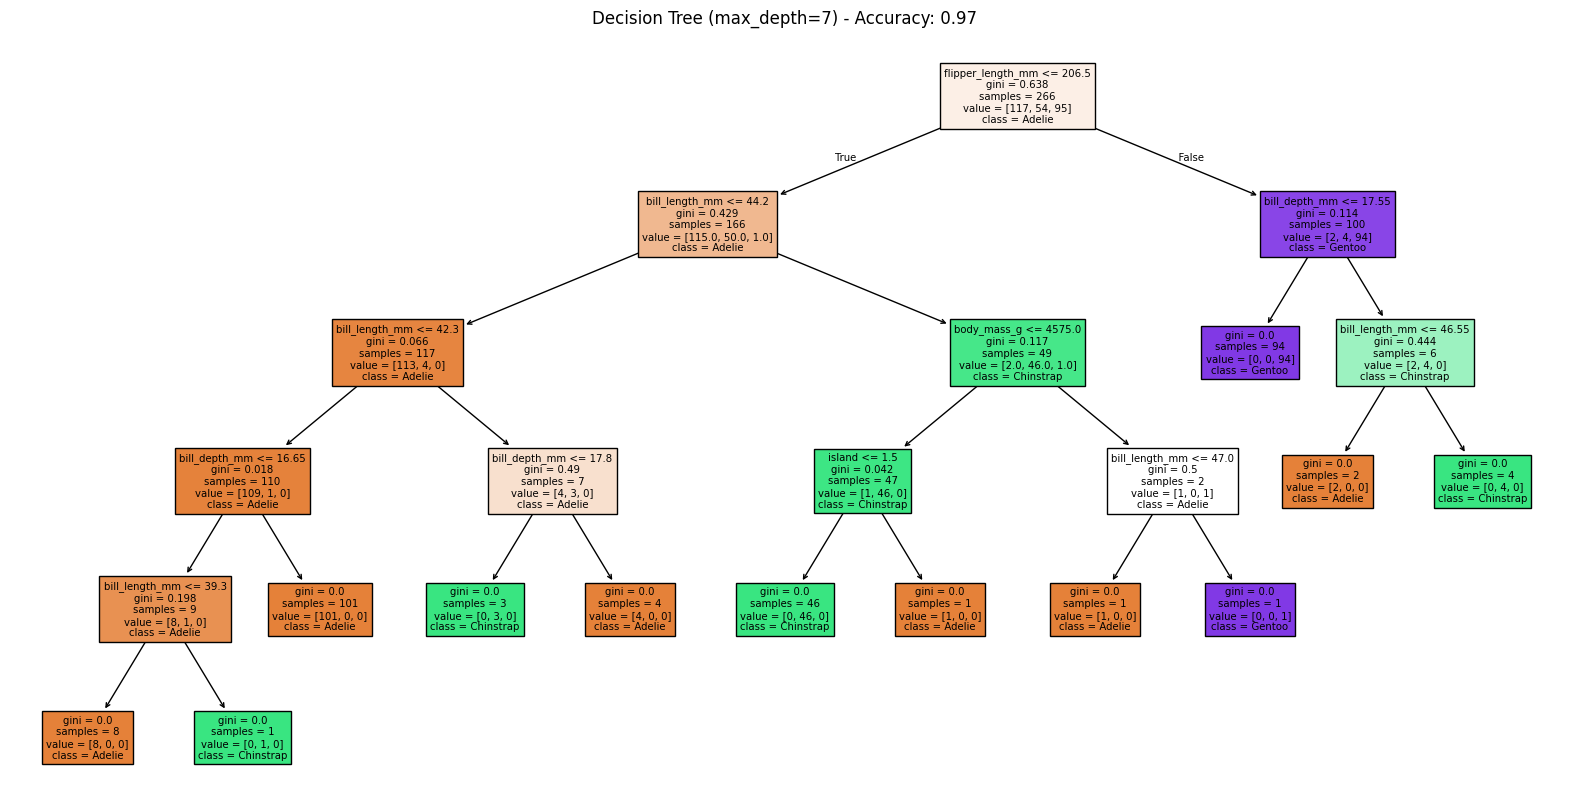


=== Accuracy Report ===
Max Depth | Accuracy
None      | 0.9701
2         | 0.9552
3         | 0.9552
4         | 0.9701
5         | 0.9701
6         | 0.9701
7         | 0.9701


In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Lấy 1 dataset 80/20 ra dùng (ví dụ dataset số 11 bạn gửi)
example = datasets[10]  # datasets[10] vì index bắt đầu từ 0, Dataset 11 là datasets[10]

depths = [None, 2, 3, 4, 5, 6, 7]
accuracy_results = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=example['seed'])
    model.fit(example['feature_train'], example['label_train'])
    y_pred = model.predict(example['feature_test'])

    acc = accuracy_score(example['label_test'], y_pred)
    accuracy_results.append((depth, acc))

    # Plot Decision Tree
    plt.figure(figsize=(20, 10))
    plot_tree(model, 
              feature_names=feature_encoded.columns, 
              class_names=model.classes_,
              filled=True)
    plt.title(f"Decision Tree (max_depth={depth}) - Accuracy: {acc:.2f}")
    plt.show()

# In ra bảng kết quả
print("\n=== Accuracy Report ===")
print("Max Depth | Accuracy")
for depth, acc in accuracy_results:
    print(f"{str(depth):9} | {acc:.4f}")